# 📈 Stock Market Prediction using Deep Learning

## Comprehensive Time Series Analysis for Indian Stock Market (NSE)

**Project Overview:**
- **Goal**: Predict future stock prices using various deep learning architectures
- **Data**: Indian NSE stocks (RELIANCE.NS, TCS.NS, INFY.NS, HDFCBANK.NS, etc.)
- **Models**: From simple baselines to advanced hybrid architectures
- **Evaluation**: Comprehensive metrics and trading performance analysis

**Model Architecture Progression:**
1. **Baseline Models**: Moving Average, Linear Regression
2. **Simple DL**: Feedforward Neural Network
3. **Sequential Models**: RNN, LSTM, GRU
4. **Convolutional**: 1D CNN for time series
5. **Advanced Models**: ESN, DBN, RBM
6. **Hybrid Architectures**: CNN-LSTM, CNN-GRU, LSTM-DNN stacks
7. **Reinforcement Learning**: DQN Trading Agent
8. **Comprehensive Evaluation**: Performance comparison and deployment strategy

In [1]:
# 🚀 Import Libraries and Setup
print("🚀 STOCK MARKET PREDICTOR - IMPORTING LIBRARIES")
print("=" * 60)

# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data collection
import yfinance as yf
from datetime import datetime, timedelta

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Deep Learning - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization, Input, concatenate, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Statistical models
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("✅ Libraries imported successfully!")
print(f"📦 TensorFlow version: {tf.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 Python version: {tf.version.VERSION}")

# Configuration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

🚀 STOCK MARKET PREDICTOR - IMPORTING LIBRARIES
✅ Libraries imported successfully!
📦 TensorFlow version: 2.20.0
📦 NumPy version: 2.3.3
📦 Pandas version: 2.3.3
📦 Python version: 2.20.0


In [2]:
# 📊 Download Historical Stock Data
print("\n📊 DOWNLOADING INDIAN STOCK MARKET DATA")
print("=" * 50)

# Define Indian NSE stock symbols
indian_stocks = {
    'Banking': ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS'],
    'IT': ['TCS.NS', 'INFY.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS'],
    'FMCG': ['HINDUNILVR.NS', 'NESTLEIND.NS', 'ITC.NS', 'BRITANNIA.NS'],
    'Auto': ['MARUTI.NS', 'TATAMOTORS.NS', 'BAJAJ-AUTO.NS', 'M&M.NS'],
    'Energy': ['RELIANCE.NS', 'ONGC.NS', 'BPCL.NS', 'IOC.NS'],
    'Pharma': ['SUNPHARMA.NS', 'DRREDDY.NS', 'CIPLA.NS', 'DIVISLAB.NS']
}

# Flatten stock list
all_stocks = []
for sector, stocks in indian_stocks.items():
    all_stocks.extend(stocks)

print(f"📈 Selected {len(all_stocks)} stocks across {len(indian_stocks)} sectors")
print("Sectors:", list(indian_stocks.keys()))

# Download stock data
start_date = '2020-01-01'
end_date = '2024-10-01'

print(f"\n📅 Downloading data from {start_date} to {end_date}")
print("Downloading progress:")

stock_data = {}
failed_downloads = []

for i, stock in enumerate(all_stocks):
    try:
        print(f"  [{i+1:2d}/{len(all_stocks)}] {stock:<15} ... ", end="")
        data = yf.download(stock, start=start_date, end=end_date, progress=False)
        
        if not data.empty and len(data) > 100:  # Ensure sufficient data
            stock_data[stock] = data
            print("✅ Success")
        else:
            failed_downloads.append(stock)
            print("❌ Insufficient data")
            
    except Exception as e:
        failed_downloads.append(stock)
        print(f"❌ Error: {str(e)[:30]}...")

print(f"\n✅ Successfully downloaded: {len(stock_data)} stocks")
print(f"❌ Failed downloads: {len(failed_downloads)} stocks")

if failed_downloads:
    print("Failed stocks:", failed_downloads)

# Display sample data
if stock_data:
    sample_stock = list(stock_data.keys())[0]
    sample_data = stock_data[sample_stock]
    
    print(f"\n📊 Sample data for {sample_stock}:")
    print(f"Shape: {sample_data.shape}")
    print(f"Columns: {list(sample_data.columns)}")
    print(f"Date range: {sample_data.index[0].date()} to {sample_data.index[-1].date()}")
    print(f"Trading days: {len(sample_data)}")
    
    print(f"\nFirst few rows:")
    print(sample_data.head())
    
    print(f"\nBasic statistics:")
    print(sample_data['Close'].describe())


📊 DOWNLOADING INDIAN STOCK MARKET DATA
📈 Selected 26 stocks across 6 sectors
Sectors: ['Banking', 'IT', 'FMCG', 'Auto', 'Energy', 'Pharma']

📅 Downloading data from 2020-01-01 to 2024-10-01
  [ 1/26] HDFCBANK.NS     ... ✅ Success
  [ 2/26] ICICIBANK.NS    ... ✅ Success
  [ 3/26] KOTAKBANK.NS    ... ✅ Success
  [ 4/26] AXISBANK.NS     ... ✅ Success
  [ 5/26] SBIN.NS         ... ✅ Success
  [ 6/26] TCS.NS          ... ✅ Success
  [ 7/26] INFY.NS         ... ✅ Success
  [ 8/26] WIPRO.NS        ... ✅ Success
  [ 9/26] HCLTECH.NS      ... ✅ Success
  [10/26] TECHM.NS        ... ✅ Success
  [11/26] HINDUNILVR.NS   ... ✅ Success
  [12/26] NESTLEIND.NS    ... ✅ Success
  [13/26] ITC.NS          ... ✅ Success
  [14/26] BRITANNIA.NS    ... ✅ Success
  [15/26] MARUTI.NS       ... ✅ Success
  [16/26] TATAMOTORS.NS   ... ✅ Success
  [17/26] BAJAJ-AUTO.NS   ... ✅ Success
  [18/26] M&M.NS          ... ✅ Success
  [19/26] RELIANCE.NS     ... ✅ Success
  [20/26] ONGC.NS         ... ✅ Success
  [21/26]


🔧 DATA PREPROCESSING & FEATURE ENGINEERING
🎯 Primary stock for detailed analysis: RELIANCE.NS
📊 Processing RELIANCE.NS...
  Shape after preprocessing: (1127, 46)
  Available features: 34

📊 Data preparation completed:
  Features shape: (1126, 34)
  Target shape: (1126, 1)
  Feature names: 34
  Date range: 2020-03-12 to 2024-09-30


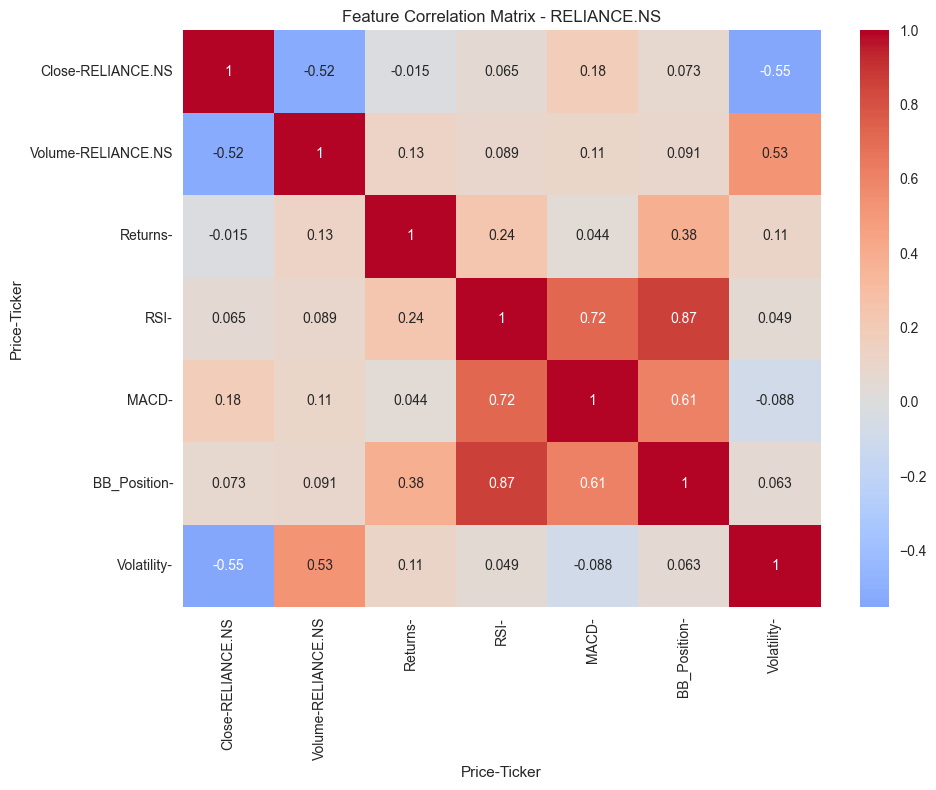


✅ Data preprocessing completed successfully!


In [4]:
# 🔧 Data Preprocessing and Feature Engineering
print("\n🔧 DATA PREPROCESSING & FEATURE ENGINEERING")
print("=" * 55)

def create_technical_indicators(data):
    """Create technical indicators from OHLCV data"""
    df = data.copy()
    
    # Basic price features
    df['Returns'] = df['Close'].pct_change()
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['High_Low_Pct'] = (df['High'] - df['Low']) / df['Close'] * 100
    df['Open_Close_Pct'] = (df['Close'] - df['Open']) / df['Open'] * 100
    
    # Moving Averages
    for window in [5, 10, 20, 50]:
        ma_col = df['Close'].rolling(window=window).mean()
        df[f'MA_{window}'] = ma_col
        df[f'Close_MA_{window}_Ratio'] = df['Close'] / ma_col
    
    # Exponential Moving Averages
    for span in [12, 26]:
        ema_col = df['Close'].ewm(span=span).mean()
        df[f'EMA_{span}'] = ema_col
    
    # MACD
    macd = df['EMA_12'] - df['EMA_26']
    df['MACD'] = macd
    macd_signal = macd.ewm(span=9).mean()
    df['MACD_Signal'] = macd_signal
    df['MACD_Histogram'] = macd - macd_signal
    
    # RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Bollinger Bands
    bb_middle = df['Close'].rolling(window=20).mean()
    df['BB_Middle'] = bb_middle
    bb_std = df['Close'].rolling(window=20).std()
    bb_upper = bb_middle + (bb_std * 2)
    bb_lower = bb_middle - (bb_std * 2)
    df['BB_Upper'] = bb_upper
    df['BB_Lower'] = bb_lower
    bb_width = bb_upper - bb_lower
    df['BB_Width'] = bb_width
    df['BB_Position'] = (df['Close'] - bb_lower) / bb_width
    
    # Volatility
    df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(252)
    
    # Volume indicators
    volume_ma = df['Volume'].rolling(window=20).mean()
    df['Volume_MA'] = volume_ma
    df['Volume_Ratio'] = df['Volume'] / volume_ma
    
    # Lag features
    for lag in [1, 2, 3, 5, 10]:
        df[f'Close_Lag_{lag}'] = df['Close'].shift(lag)
        df[f'Returns_Lag_{lag}'] = df['Returns'].shift(lag)
        df[f'Volume_Lag_{lag}'] = df['Volume'].shift(lag)
    
    return df

def prepare_data_for_modeling(stock_symbol, data, sequence_length=60, target_days=1):
    """Prepare data for time series modeling"""
    
    print(f"📊 Processing {stock_symbol}...")
    
    # Create technical indicators
    processed_data = create_technical_indicators(data)
    
    # Remove rows with NaN values
    processed_data = processed_data.dropna()
    
    print(f"  Shape after preprocessing: {processed_data.shape}")
    
    # Select features for modeling
    feature_columns = [
        'Open', 'High', 'Low', 'Close', 'Volume',
        'Returns', 'Log_Returns', 'High_Low_Pct', 'Open_Close_Pct',
        'MA_5', 'MA_10', 'MA_20', 'MA_50',
        'Close_MA_5_Ratio', 'Close_MA_10_Ratio', 'Close_MA_20_Ratio',
        'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'MACD_Histogram',
        'RSI', 'BB_Position', 'BB_Width', 'Volatility',
        'Volume_MA', 'Volume_Ratio',
        'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_5',
        'Returns_Lag_1', 'Returns_Lag_2', 'Returns_Lag_3'
    ]
    
    # Ensure all feature columns exist
    available_features = [col for col in feature_columns if col in processed_data.columns]
    print(f"  Available features: {len(available_features)}")
    
    # Create feature matrix and target
    X = processed_data[available_features].values
    y = processed_data['Close'].shift(-target_days).values  # Predict target_days ahead
    
    # Remove last few rows where target is NaN
    X = X[:-target_days]
    y = y[:-target_days]
    
    return X, y, available_features, processed_data

# Choose primary stock for detailed modeling
primary_stock = 'RELIANCE.NS'
if primary_stock not in stock_data:
    primary_stock = list(stock_data.keys())[0]

print(f"🎯 Primary stock for detailed analysis: {primary_stock}")

# Process the primary stock
X_raw, y_raw, feature_names, processed_df = prepare_data_for_modeling(
    primary_stock, 
    stock_data[primary_stock], 
    sequence_length=60,
    target_days=1
)

print(f"\n📊 Data preparation completed:")
print(f"  Features shape: {X_raw.shape}")
print(f"  Target shape: {y_raw.shape}")
print(f"  Feature names: {len(feature_names)}")
print(f"  Date range: {processed_df.index[0].date()} to {processed_df.index[-1].date()}")

# Display correlation matrix for key features
key_features = ['Close', 'Volume', 'Returns', 'RSI', 'MACD', 'BB_Position', 'Volatility']
correlation_matrix = processed_df[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(f'Feature Correlation Matrix - {primary_stock}')
plt.tight_layout()
plt.show()

print("\n✅ Data preprocessing completed successfully!")

In [5]:
# ✂️ Train-Validation-Test Split
print("\n✂️ CREATING TIME-BASED DATA SPLITS")
print("=" * 45)

def create_sequences(X, y, sequence_length=60):
    """Create sequences for time series modeling"""
    X_seq, y_seq = [], []
    
    for i in range(sequence_length, len(X)):
        X_seq.append(X[i-sequence_length:i])
        y_seq.append(y[i])
    
    return np.array(X_seq), np.array(y_seq)

# Normalize features
print("🔧 Normalizing features...")
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X_raw)
y_scaled = target_scaler.fit_transform(y_raw.reshape(-1, 1)).flatten()

print(f"✅ Features normalized: {X_scaled.shape}")
print(f"✅ Target normalized: {y_scaled.shape}")

# Create sequences for time series models
sequence_length = 60
print(f"\n📊 Creating sequences with length: {sequence_length}")

X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, sequence_length)

print(f"Sequence shapes:")
print(f"  X_sequences: {X_sequences.shape}")
print(f"  y_sequences: {y_sequences.shape}")

# Time-based splitting (important for time series!)
train_size = int(0.7 * len(X_sequences))
val_size = int(0.15 * len(X_sequences))
test_size = len(X_sequences) - train_size - val_size

print(f"\n✂️ Data split sizes:")
print(f"  Training: {train_size} samples ({train_size/len(X_sequences)*100:.1f}%)")
print(f"  Validation: {val_size} samples ({val_size/len(X_sequences)*100:.1f}%)")
print(f"  Testing: {test_size} samples ({test_size/len(X_sequences)*100:.1f}%)")

# Split sequences
X_train_seq = X_sequences[:train_size]
y_train_seq = y_sequences[:train_size]

X_val_seq = X_sequences[train_size:train_size + val_size]
y_val_seq = y_sequences[train_size:train_size + val_size]

X_test_seq = X_sequences[train_size + val_size:]
y_test_seq = y_sequences[train_size + val_size:]

# Also create flat versions for non-sequence models
X_train_flat = X_scaled[:train_size]
y_train_flat = y_scaled[:train_size]

X_val_flat = X_scaled[train_size:train_size + val_size]
y_val_flat = y_scaled[train_size:train_size + val_size]

X_test_flat = X_scaled[train_size + val_size:train_size + val_size + test_size]
y_test_flat = y_scaled[train_size + val_size:train_size + val_size + test_size]

print(f"\n📊 Final data shapes:")
print("Sequence data:")
print(f"  X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}")
print(f"  X_val_seq: {X_val_seq.shape}, y_val_seq: {y_val_seq.shape}")
print(f"  X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}")

print("Flat data:")
print(f"  X_train_flat: {X_train_flat.shape}, y_train_flat: {y_train_flat.shape}")
print(f"  X_val_flat: {X_val_flat.shape}, y_val_flat: {y_val_flat.shape}")
print(f"  X_test_flat: {X_test_flat.shape}, y_test_flat: {y_test_flat.shape}")

# Store data info for later use
data_info = {
    'primary_stock': primary_stock,
    'sequence_length': sequence_length,
    'n_features': X_scaled.shape[1],
    'feature_names': feature_names,
    'train_size': train_size,
    'val_size': val_size,
    'test_size': test_size,
    'feature_scaler': feature_scaler,
    'target_scaler': target_scaler
}

print(f"\n✅ Data splitting completed successfully!")
print(f"🎯 Ready for model training with {data_info['n_features']} features")


✂️ CREATING TIME-BASED DATA SPLITS
🔧 Normalizing features...
✅ Features normalized: (1126, 34)
✅ Target normalized: (1126,)

📊 Creating sequences with length: 60
Sequence shapes:
  X_sequences: (1066, 60, 34)
  y_sequences: (1066,)

✂️ Data split sizes:
  Training: 746 samples (70.0%)
  Validation: 159 samples (14.9%)
  Testing: 161 samples (15.1%)

📊 Final data shapes:
Sequence data:
  X_train_seq: (746, 60, 34), y_train_seq: (746,)
  X_val_seq: (159, 60, 34), y_val_seq: (159,)
  X_test_seq: (161, 60, 34), y_test_seq: (161,)
Flat data:
  X_train_flat: (746, 34), y_train_flat: (746,)
  X_val_flat: (159, 34), y_val_flat: (159,)
  X_test_flat: (161, 34), y_test_flat: (161,)

✅ Data splitting completed successfully!
🎯 Ready for model training with 34 features


In [8]:
# 📈 Baseline Models - Moving Average
print("\n📈 BASELINE MODELS - MOVING AVERAGE")
print("=" * 45)

def calculate_metrics(y_true, y_pred, model_name, scaler=None):
    """Calculate comprehensive evaluation metrics"""
    
    # If scaler provided, inverse transform for interpretable metrics
    if scaler is not None:
        y_true_orig = scaler.inverse_transform(y_true.reshape(-1, 1)).flatten()
        y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_true_orig, y_pred_orig = y_true, y_pred
    
    # Calculate metrics
    mse = mean_squared_error(y_true_orig, y_pred_orig)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_orig, y_pred_orig)
    r2 = r2_score(y_true_orig, y_pred_orig)
    
    # Directional accuracy
    true_direction = np.diff(y_true_orig) > 0
    pred_direction = np.diff(y_pred_orig) > 0
    directional_accuracy = np.mean(true_direction == pred_direction)
    
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true_orig - y_pred_orig) / y_true_orig)) * 100
    
    metrics = {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape,
        'Directional_Accuracy': directional_accuracy
    }
    
    return metrics

# Simple Moving Average
def simple_moving_average(data, window=20):
    """Simple Moving Average prediction"""
    return data.rolling(window=window).mean()

# Exponential Moving Average
def exponential_moving_average(data, span=20):
    """Exponential Moving Average prediction"""
    return data.ewm(span=span).mean()

print("🔄 Testing Moving Average models...")

# Get close prices for baseline models
close_prices = processed_df['Close'].values
dates = processed_df.index

# Test different MA windows
ma_windows = [5, 10, 20, 50]
ma_results = {}

for window in ma_windows:
    print(f"  📊 Simple MA with window {window}...")
    
    # Calculate predictions
    ma_pred = simple_moving_average(processed_df['Close'], window=window)
    
    # Align with test data
    test_start_idx = len(processed_df) - len(y_test_flat)
    ma_test_pred = ma_pred.iloc[test_start_idx:].values
    
    # Ensure it's 1D and same length as test data
    if ma_test_pred.ndim > 1:
        ma_test_pred = ma_test_pred.flatten()
    
    min_len = min(len(ma_test_pred), len(y_test_flat))
    ma_test_pred = ma_test_pred[:min_len]
    y_test_ma = y_test_flat[:min_len]
    
    # Remove NaN values
    valid_idx = ~np.isnan(ma_test_pred)
    ma_test_pred = ma_test_pred[valid_idx]
    y_test_ma = y_test_ma[valid_idx]
    
    if len(ma_test_pred) > 0:
        # Normalize predictions to match scaled target
        ma_test_pred_scaled = target_scaler.transform(ma_test_pred.reshape(-1, 1)).flatten()
        
        # Calculate metrics
        metrics = calculate_metrics(
            y_test_ma, ma_test_pred_scaled, 
            f'Simple_MA_{window}', target_scaler
        )
        ma_results[f'SMA_{window}'] = metrics

# Exponential Moving Average
ema_spans = [12, 26, 50]
for span in ema_spans:
    print(f"  📊 Exponential MA with span {span}...")
    
    ema_pred = exponential_moving_average(processed_df['Close'], span=span)
    
    # Align with test data
    ema_test_pred = ema_pred.iloc[test_start_idx:].values
    
    # Ensure it's 1D and same length as test data
    if ema_test_pred.ndim > 1:
        ema_test_pred = ema_test_pred.flatten()
    
    min_len = min(len(ema_test_pred), len(y_test_flat))
    ema_test_pred = ema_test_pred[:min_len]
    y_test_ema = y_test_flat[:min_len]
    
    # Remove NaN values
    valid_idx = ~np.isnan(ema_test_pred)
    ema_test_pred = ema_test_pred[valid_idx]
    y_test_ema = y_test_ema[valid_idx]
    
    if len(ema_test_pred) > 0:
        # Normalize predictions
        ema_test_pred_scaled = target_scaler.transform(ema_test_pred.reshape(-1, 1)).flatten()
        
        # Calculate metrics
        metrics = calculate_metrics(
            y_test_ema, ema_test_pred_scaled, 
            f'EMA_{span}', target_scaler
        )
        ma_results[f'EMA_{span}'] = metrics

# Display results
print(f"\n📊 Moving Average Results:")
print("-" * 80)
print(f"{'Model':<12} {'RMSE':<10} {'MAE':<10} {'R²':<8} {'MAPE':<8} {'Dir_Acc':<8}")
print("-" * 80)

for model_name, metrics in ma_results.items():
    print(f"{model_name:<12} {metrics['RMSE']:<10.2f} {metrics['MAE']:<10.2f} "
          f"{metrics['R²']:<8.4f} {metrics['MAPE']:<8.2f} {metrics['Directional_Accuracy']:<8.4f}")

# Visualize best MA model
best_ma_model = min(ma_results.keys(), key=lambda x: ma_results[x]['RMSE'])
print(f"\n🏆 Best Moving Average Model: {best_ma_model}")
print(f"    RMSE: {ma_results[best_ma_model]['RMSE']:.2f}")
print(f"    R²: {ma_results[best_ma_model]['R²']:.4f}")

print("\n✅ Moving Average baseline models completed!")


📈 BASELINE MODELS - MOVING AVERAGE
🔄 Testing Moving Average models...
  📊 Simple MA with window 5...
  📊 Simple MA with window 10...
  📊 Simple MA with window 20...
  📊 Simple MA with window 50...
  📊 Exponential MA with span 12...
  📊 Exponential MA with span 26...
  📊 Exponential MA with span 50...

📊 Moving Average Results:
--------------------------------------------------------------------------------
Model        RMSE       MAE        R²       MAPE     Dir_Acc 
--------------------------------------------------------------------------------
SMA_5        136.35     102.87     -0.5778  8.01     0.4375  
SMA_10       133.97     102.01     -0.5231  7.93     0.4313  
SMA_20       127.57     98.07      -0.3811  7.61     0.4688  
SMA_50       97.08      76.88      0.2002   5.92     0.5000  
EMA_12       131.23     99.95      -0.4615  7.78     0.4500  
EMA_26       118.99     91.77      -0.2016  7.12     0.5000  
EMA_50       96.25      75.64      0.2139   5.85     0.5312  

🏆 Best Movi

In [9]:
# 📊 Linear Regression Baseline
print("\n📊 LINEAR REGRESSION BASELINE")
print("=" * 40)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Linear Regression with different regularizations
regression_models = {
    'Linear_Regression': LinearRegression(),
    'Ridge_Regression': Ridge(alpha=1.0),
    'Lasso_Regression': Lasso(alpha=0.1),
    'Random_Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

regression_results = {}

print("🔄 Training regression models...")

for model_name, model in regression_models.items():
    print(f"  📊 Training {model_name}...")
    
    try:
        # Train model
        model.fit(X_train_flat, y_train_flat)
        
        # Make predictions
        y_train_pred = model.predict(X_train_flat)
        y_val_pred = model.predict(X_val_flat)
        y_test_pred = model.predict(X_test_flat)
        
        # Calculate metrics for test set
        test_metrics = calculate_metrics(
            y_test_flat, y_test_pred, model_name, target_scaler
        )
        
        # Add train/val metrics
        train_metrics = calculate_metrics(
            y_train_flat, y_train_pred, f"{model_name}_train", target_scaler
        )
        val_metrics = calculate_metrics(
            y_val_flat, y_val_pred, f"{model_name}_val", target_scaler
        )
        
        # Store results
        regression_results[model_name] = {
            'test': test_metrics,
            'train': train_metrics,
            'val': val_metrics,
            'model': model,
            'predictions': {
                'train': y_train_pred,
                'val': y_val_pred,
                'test': y_test_pred
            }
        }
        
        print(f"    ✅ Test RMSE: {test_metrics['RMSE']:.2f}, R²: {test_metrics['R²']:.4f}")
        
    except Exception as e:
        print(f"    ❌ Error: {str(e)}")

# Feature importance for Random Forest
if 'Random_Forest' in regression_results:
    rf_model = regression_results['Random_Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🌲 Top 10 Important Features (Random Forest):")
    print(feature_importance.head(10).to_string(index=False))

# Display regression results
print(f"\n📊 Regression Model Results:")
print("-" * 85)
print(f"{'Model':<18} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<10} {'Dir_Acc':<8}")
print("-" * 85)

for model_name, results in regression_results.items():
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    test_dir_acc = results['test']['Directional_Accuracy']
    
    print(f"{model_name:<18} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<10.4f} {test_dir_acc:<8.4f}")

# Find best regression model
best_regression = min(regression_results.keys(), 
                     key=lambda x: regression_results[x]['test']['RMSE'])

print(f"\n🏆 Best Regression Model: {best_regression}")
print(f"    Test RMSE: {regression_results[best_regression]['test']['RMSE']:.2f}")
print(f"    Test R²: {regression_results[best_regression]['test']['R²']:.4f}")
print(f"    Directional Accuracy: {regression_results[best_regression]['test']['Directional_Accuracy']:.4f}")

print("\n✅ Linear regression baseline completed!")


📊 LINEAR REGRESSION BASELINE
🔄 Training regression models...
  📊 Training Linear_Regression...
    ✅ Test RMSE: 22.48, R²: 0.9571
  📊 Training Ridge_Regression...
    ✅ Test RMSE: 23.10, R²: 0.9547
  📊 Training Lasso_Regression...
    ✅ Test RMSE: 387.60, R²: -11.7498
  📊 Training Random_Forest...
    ✅ Test RMSE: 174.54, R²: -1.5854

🌲 Top 10 Important Features (Random Forest):
    feature  importance
      Close    0.631253
        Low    0.105500
       High    0.043854
Close_Lag_3    0.039203
       MA_5    0.024442
Close_Lag_2    0.023985
     EMA_12    0.020668
Close_Lag_1    0.018696
      MA_10    0.018479
     EMA_26    0.018216

📊 Regression Model Results:
-------------------------------------------------------------------------------------
Model              Train_RMSE   Val_RMSE     Test_RMSE    Test_R²    Dir_Acc 
-------------------------------------------------------------------------------------
Linear_Regression  17.62        12.70        22.48        0.9571     0.475


🧠 SIMPLE FEEDFORWARD NEURAL NETWORK
🔄 Training DNN models...

  🧠 Training DNN_Small...
    Architecture: [64, 32]
    Dropout: 0.2
    ✅ Training completed!
    📊 Test RMSE: 79.75
    📊 Test R²: 0.4602
    📊 Directional Accuracy: 0.5375
    ⏱️ Training epochs: 30

  🧠 Training DNN_Medium...
    Architecture: [128, 64, 32]
    Dropout: 0.3
    ✅ Training completed!
    📊 Test RMSE: 184.85
    📊 Test R²: -1.8997
    📊 Directional Accuracy: 0.4875
    ⏱️ Training epochs: 19

  🧠 Training DNN_Large...
    Architecture: [256, 128, 64, 32]
    Dropout: 0.4
    ✅ Training completed!
    📊 Test RMSE: 238.49
    📊 Test R²: -3.8272
    📊 Directional Accuracy: 0.4688
    ⏱️ Training epochs: 33

📊 DNN Model Comparison:
-------------------------------------------------------------------------------------
Model        Parameters   Train_RMSE   Val_RMSE     Test_RMSE    Test_R²   
-------------------------------------------------------------------------------------
DNN_Small    4,737        88.52  

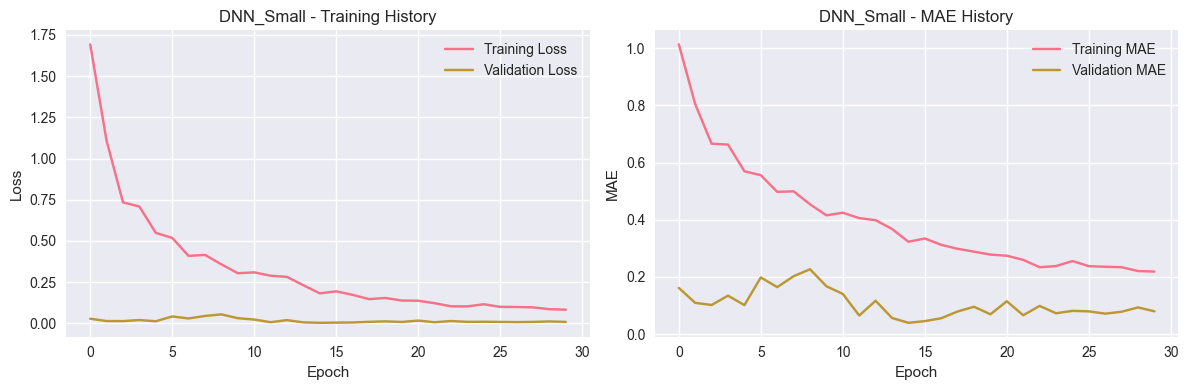


✅ Simple feedforward neural network completed!


In [10]:
# 🧠 Simple Feedforward Neural Network
print("\n🧠 SIMPLE FEEDFORWARD NEURAL NETWORK")
print("=" * 45)

def create_dnn_model(input_dim, layers=[128, 64, 32], dropout_rate=0.3):
    """Create a simple feedforward neural network"""
    model = Sequential([
        Dense(layers[0], activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout_rate)
    ])
    
    # Add hidden layers
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    return model

# Create DNN variants
dnn_configs = {
    'DNN_Small': {'layers': [64, 32], 'dropout': 0.2},
    'DNN_Medium': {'layers': [128, 64, 32], 'dropout': 0.3},
    'DNN_Large': {'layers': [256, 128, 64, 32], 'dropout': 0.4}
}

dnn_results = {}

print("🔄 Training DNN models...")

for model_name, config in dnn_configs.items():
    print(f"\n  🧠 Training {model_name}...")
    print(f"    Architecture: {config['layers']}")
    print(f"    Dropout: {config['dropout']}")
    
    # Create model
    model = create_dnn_model(
        input_dim=X_train_flat.shape[1],
        layers=config['layers'],
        dropout_rate=config['dropout']
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-6)
    ]
    
    # Train model
    history = model.fit(
        X_train_flat, y_train_flat,
        validation_data=(X_val_flat, y_val_flat),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    
    # Make predictions
    y_train_pred = model.predict(X_train_flat, verbose=0).flatten()
    y_val_pred = model.predict(X_val_flat, verbose=0).flatten()
    y_test_pred = model.predict(X_test_flat, verbose=0).flatten()
    
    # Calculate metrics
    test_metrics = calculate_metrics(y_test_flat, y_test_pred, model_name, target_scaler)
    train_metrics = calculate_metrics(y_train_flat, y_train_pred, f"{model_name}_train", target_scaler)
    val_metrics = calculate_metrics(y_val_flat, y_val_pred, f"{model_name}_val", target_scaler)
    
    # Store results
    dnn_results[model_name] = {
        'test': test_metrics,
        'train': train_metrics,
        'val': val_metrics,
        'model': model,
        'history': history,
        'predictions': {
            'train': y_train_pred,
            'val': y_val_pred,
            'test': y_test_pred
        }
    }
    
    print(f"    ✅ Training completed!")
    print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
    print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
    print(f"    📊 Directional Accuracy: {test_metrics['Directional_Accuracy']:.4f}")
    print(f"    ⏱️ Training epochs: {len(history.history['loss'])}")

# Display DNN results comparison
print(f"\n📊 DNN Model Comparison:")
print("-" * 85)
print(f"{'Model':<12} {'Parameters':<12} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<10}")
print("-" * 85)

for model_name, results in dnn_results.items():
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<12} {params:<12,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<10.4f}")

# Find best DNN model
best_dnn = min(dnn_results.keys(), key=lambda x: dnn_results[x]['test']['RMSE'])

print(f"\n🏆 Best DNN Model: {best_dnn}")
print(f"    Parameters: {dnn_results[best_dnn]['model'].count_params():,}")
print(f"    Test RMSE: {dnn_results[best_dnn]['test']['RMSE']:.2f}")
print(f"    Test R²: {dnn_results[best_dnn]['test']['R²']:.4f}")

# Plot training history for best model
best_history = dnn_results[best_dnn]['history']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'{best_dnn} - Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_history.history['mae'], label='Training MAE')
plt.plot(best_history.history['val_mae'], label='Validation MAE')
plt.title(f'{best_dnn} - MAE History')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

print("\n✅ Simple feedforward neural network completed!")

In [11]:
# 🔄 RNN Implementation
print("\n🔄 RECURRENT NEURAL NETWORK (RNN)")
print("=" * 40)

def create_rnn_model(sequence_length, n_features, rnn_units=50, dense_units=32, dropout=0.3):
    """Create RNN model for time series prediction"""
    model = Sequential([
        SimpleRNN(rnn_units, return_sequences=True, input_shape=(sequence_length, n_features)),
        Dropout(dropout),
        SimpleRNN(rnn_units // 2, return_sequences=False),
        Dropout(dropout),
        Dense(dense_units, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='linear')
    ])
    return model

# RNN configurations
rnn_configs = {
    'RNN_Small': {'rnn_units': 32, 'dense_units': 16, 'dropout': 0.2},
    'RNN_Medium': {'rnn_units': 50, 'dense_units': 32, 'dropout': 0.3},
    'RNN_Large': {'rnn_units': 100, 'dense_units': 64, 'dropout': 0.4}
}

rnn_results = {}

print("🔄 Training RNN models...")

for model_name, config in rnn_configs.items():
    print(f"\n  🔄 Training {model_name}...")
    print(f"    RNN units: {config['rnn_units']}")
    print(f"    Dense units: {config['dense_units']}")
    print(f"    Dropout: {config['dropout']}")
    
    # Create model
    model = create_rnn_model(
        sequence_length=sequence_length,
        n_features=data_info['n_features'],
        rnn_units=config['rnn_units'],
        dense_units=config['dense_units'],
        dropout=config['dropout']
    )
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    ]
    
    # Train
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    
    # Predictions
    y_train_pred = model.predict(X_train_seq, verbose=0).flatten()
    y_val_pred = model.predict(X_val_seq, verbose=0).flatten()
    y_test_pred = model.predict(X_test_seq, verbose=0).flatten()
    
    # Metrics
    test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
    train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
    val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
    
    # Store results
    rnn_results[model_name] = {
        'test': test_metrics,
        'train': train_metrics,
        'val': val_metrics,
        'model': model,
        'history': history,
        'predictions': {
            'train': y_train_pred,
            'val': y_val_pred,
            'test': y_test_pred
        }
    }
    
    print(f"    ✅ Training completed!")
    print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
    print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
    print(f"    ⏱️ Epochs: {len(history.history['loss'])}")

print(f"\n📊 RNN Model Results:")
print("-" * 85)
print(f"{'Model':<12} {'Parameters':<12} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<10}")
print("-" * 85)

for model_name, results in rnn_results.items():
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<12} {params:<12,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<10.4f}")

# Best RNN model
best_rnn = min(rnn_results.keys(), key=lambda x: rnn_results[x]['test']['RMSE'])
print(f"\n🏆 Best RNN Model: {best_rnn}")
print(f"    Test RMSE: {rnn_results[best_rnn]['test']['RMSE']:.2f}")
print(f"    Test R²: {rnn_results[best_rnn]['test']['R²']:.4f}")

print("\n✅ RNN implementation completed!")


🔄 RECURRENT NEURAL NETWORK (RNN)
🔄 Training RNN models...

  🔄 Training RNN_Small...
    RNN units: 32
    Dense units: 16
    Dropout: 0.2
    ✅ Training completed!
    📊 Test RMSE: 264.53
    📊 Test R²: -38.7471
    ⏱️ Epochs: 100

  🔄 Training RNN_Medium...
    RNN units: 50
    Dense units: 32
    Dropout: 0.3
    ✅ Training completed!
    📊 Test RMSE: 256.89
    📊 Test R²: -36.4858
    ⏱️ Epochs: 85

  🔄 Training RNN_Large...
    RNN units: 100
    Dense units: 64
    Dropout: 0.4
    ✅ Training completed!
    📊 Test RMSE: 291.25
    📊 Test R²: -47.1831
    ⏱️ Epochs: 61

📊 RNN Model Results:
-------------------------------------------------------------------------------------
Model        Parameters   Train_RMSE   Val_RMSE     Test_RMSE    Test_R²   
-------------------------------------------------------------------------------------
RNN_Small    3,217        39.01        80.23        264.53       -38.7471  
RNN_Medium   7,015        37.26        76.55        256.89       -36.4

In [12]:
# 🧬 LSTM Model
print("\n🧬 LONG SHORT-TERM MEMORY (LSTM)")
print("=" * 40)

def create_lstm_model(sequence_length, n_features, lstm_units=50, dense_units=32, dropout=0.3, layers=2):
    """Create LSTM model with variable architecture"""
    model = Sequential()
    
    # First LSTM layer
    model.add(LSTM(
        lstm_units, 
        return_sequences=True if layers > 1 else False,
        input_shape=(sequence_length, n_features)
    ))
    model.add(Dropout(dropout))
    
    # Additional LSTM layers
    for i in range(1, layers):
        return_seq = True if i < layers - 1 else False
        model.add(LSTM(lstm_units // (i + 1), return_sequences=return_seq))
        model.add(Dropout(dropout))
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))
    
    return model

# LSTM configurations
lstm_configs = {
    'LSTM_Single': {'lstm_units': 50, 'dense_units': 32, 'dropout': 0.3, 'layers': 1},
    'LSTM_Double': {'lstm_units': 64, 'dense_units': 32, 'dropout': 0.3, 'layers': 2},
    'LSTM_Deep': {'lstm_units': 100, 'dense_units': 64, 'dropout': 0.4, 'layers': 3},
    'LSTM_Wide': {'lstm_units': 128, 'dense_units': 64, 'dropout': 0.3, 'layers': 2}
}

lstm_results = {}

print("🔄 Training LSTM models...")

for model_name, config in lstm_configs.items():
    print(f"\n  🧬 Training {model_name}...")
    print(f"    LSTM units: {config['lstm_units']}")
    print(f"    Layers: {config['layers']}")
    print(f"    Dense units: {config['dense_units']}")
    
    # Create model
    model = create_lstm_model(
        sequence_length=sequence_length,
        n_features=data_info['n_features'],
        lstm_units=config['lstm_units'],
        dense_units=config['dense_units'],
        dropout=config['dropout'],
        layers=config['layers']
    )
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    ]
    
    # Train
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    
    # Predictions
    y_train_pred = model.predict(X_train_seq, verbose=0).flatten()
    y_val_pred = model.predict(X_val_seq, verbose=0).flatten()
    y_test_pred = model.predict(X_test_seq, verbose=0).flatten()
    
    # Metrics
    test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
    train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
    val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
    
    # Store results
    lstm_results[model_name] = {
        'test': test_metrics,
        'train': train_metrics,
        'val': val_metrics,
        'model': model,
        'history': history,
        'config': config,
        'predictions': {
            'train': y_train_pred,
            'val': y_val_pred,
            'test': y_test_pred
        }
    }
    
    print(f"    ✅ Training completed!")
    print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
    print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
    print(f"    📊 Dir. Accuracy: {test_metrics['Directional_Accuracy']:.4f}")
    print(f"    ⏱️ Epochs: {len(history.history['loss'])}")

print(f"\n📊 LSTM Model Comparison:")
print("-" * 100)
print(f"{'Model':<12} {'Layers':<7} {'Params':<10} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<8}")
print("-" * 100)

for model_name, results in lstm_results.items():
    layers = results['config']['layers']
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<12} {layers:<7} {params:<10,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<8.4f}")

# Best LSTM model
best_lstm = min(lstm_results.keys(), key=lambda x: lstm_results[x]['test']['RMSE'])
print(f"\n🏆 Best LSTM Model: {best_lstm}")
print(f"    Architecture: {lstm_results[best_lstm]['config']}")
print(f"    Parameters: {lstm_results[best_lstm]['model'].count_params():,}")
print(f"    Test RMSE: {lstm_results[best_lstm]['test']['RMSE']:.2f}")
print(f"    Test R²: {lstm_results[best_lstm]['test']['R²']:.4f}")

print("\n✅ LSTM implementation completed!")


🧬 LONG SHORT-TERM MEMORY (LSTM)
🔄 Training LSTM models...

  🧬 Training LSTM_Single...
    LSTM units: 50
    Layers: 1
    Dense units: 32
    ✅ Training completed!
    📊 Test RMSE: 114.91
    📊 Test R²: -6.5009
    📊 Dir. Accuracy: 0.4625
    ⏱️ Epochs: 60

  🧬 Training LSTM_Double...
    LSTM units: 64
    Layers: 2
    Dense units: 32
    ✅ Training completed!
    📊 Test RMSE: 114.54
    📊 Test R²: -6.4518
    📊 Dir. Accuracy: 0.4875
    ⏱️ Epochs: 46

  🧬 Training LSTM_Deep...
    LSTM units: 100
    Layers: 3
    Dense units: 64
    ✅ Training completed!
    📊 Test RMSE: 128.15
    📊 Test R²: -8.3289
    📊 Dir. Accuracy: 0.5000
    ⏱️ Epochs: 42

  🧬 Training LSTM_Wide...
    LSTM units: 128
    Layers: 2
    Dense units: 64
    ✅ Training completed!
    📊 Test RMSE: 105.38
    📊 Test R²: -5.3076
    📊 Dir. Accuracy: 0.4875
    ⏱️ Epochs: 60

📊 LSTM Model Comparison:
----------------------------------------------------------------------------------------------------
Model       

In [13]:
# 🚪 GRU Model
print("\n🚪 GATED RECURRENT UNIT (GRU)")
print("=" * 35)

def create_gru_model(sequence_length, n_features, gru_units=50, dense_units=32, dropout=0.3, layers=2):
    """Create GRU model with variable architecture"""
    model = Sequential()
    
    # First GRU layer
    model.add(GRU(
        gru_units, 
        return_sequences=True if layers > 1 else False,
        input_shape=(sequence_length, n_features)
    ))
    model.add(Dropout(dropout))
    
    # Additional GRU layers
    for i in range(1, layers):
        return_seq = True if i < layers - 1 else False
        model.add(GRU(gru_units // (i + 1), return_sequences=return_seq))
        model.add(Dropout(dropout))
    
    # Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear'))
    
    return model

# GRU configurations
gru_configs = {
    'GRU_Single': {'gru_units': 50, 'dense_units': 32, 'dropout': 0.3, 'layers': 1},
    'GRU_Double': {'gru_units': 64, 'dense_units': 32, 'dropout': 0.3, 'layers': 2},
    'GRU_Deep': {'gru_units': 100, 'dense_units': 64, 'dropout': 0.4, 'layers': 3},
    'GRU_Wide': {'gru_units': 128, 'dense_units': 64, 'dropout': 0.3, 'layers': 2}
}

gru_results = {}

print("🔄 Training GRU models...")

for model_name, config in gru_configs.items():
    print(f"\n  🚪 Training {model_name}...")
    print(f"    GRU units: {config['gru_units']}")
    print(f"    Layers: {config['layers']}")
    
    # Create model
    model = create_gru_model(
        sequence_length=sequence_length,
        n_features=data_info['n_features'],
        gru_units=config['gru_units'],
        dense_units=config['dense_units'],
        dropout=config['dropout'],
        layers=config['layers']
    )
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    ]
    
    # Train
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )
    
    # Predictions
    y_train_pred = model.predict(X_train_seq, verbose=0).flatten()
    y_val_pred = model.predict(X_val_seq, verbose=0).flatten()
    y_test_pred = model.predict(X_test_seq, verbose=0).flatten()
    
    # Metrics
    test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
    train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
    val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
    
    # Store results
    gru_results[model_name] = {
        'test': test_metrics,
        'train': train_metrics,
        'val': val_metrics,
        'model': model,
        'history': history,
        'config': config,
        'predictions': {
            'train': y_train_pred,
            'val': y_val_pred,
            'test': y_test_pred
        }
    }
    
    print(f"    ✅ Training completed!")
    print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
    print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
    print(f"    ⏱️ Epochs: {len(history.history['loss'])}")

print(f"\n📊 GRU Model Comparison:")
print("-" * 100)
print(f"{'Model':<12} {'Layers':<7} {'Params':<10} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<8}")
print("-" * 100)

for model_name, results in gru_results.items():
    layers = results['config']['layers']
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<12} {layers:<7} {params:<10,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<8.4f}")

# Best GRU model
best_gru = min(gru_results.keys(), key=lambda x: gru_results[x]['test']['RMSE'])
print(f"\n🏆 Best GRU Model: {best_gru}")
print(f"    Parameters: {gru_results[best_gru]['model'].count_params():,}")
print(f"    Test RMSE: {gru_results[best_gru]['test']['RMSE']:.2f}")
print(f"    Test R²: {gru_results[best_gru]['test']['R²']:.4f}")

print("\n✅ GRU implementation completed!")


🚪 GATED RECURRENT UNIT (GRU)
🔄 Training GRU models...

  🚪 Training GRU_Single...
    GRU units: 50
    Layers: 1
    ✅ Training completed!
    📊 Test RMSE: 113.47
    📊 Test R²: -6.3133
    ⏱️ Epochs: 44

  🚪 Training GRU_Double...
    GRU units: 64
    Layers: 2
    ✅ Training completed!
    📊 Test RMSE: 113.47
    📊 Test R²: -6.3133
    ⏱️ Epochs: 44

  🚪 Training GRU_Double...
    GRU units: 64
    Layers: 2
    ✅ Training completed!
    📊 Test RMSE: 68.84
    📊 Test R²: -1.6919
    ⏱️ Epochs: 100

  🚪 Training GRU_Deep...
    GRU units: 100
    Layers: 3
    ✅ Training completed!
    📊 Test RMSE: 68.84
    📊 Test R²: -1.6919
    ⏱️ Epochs: 100

  🚪 Training GRU_Deep...
    GRU units: 100
    Layers: 3
    ✅ Training completed!
    📊 Test RMSE: 67.55
    📊 Test R²: -1.5917
    ⏱️ Epochs: 49

  🚪 Training GRU_Wide...
    GRU units: 128
    Layers: 2
    ✅ Training completed!
    📊 Test RMSE: 67.55
    📊 Test R²: -1.5917
    ⏱️ Epochs: 49

  🚪 Training GRU_Wide...
    GRU units: 128

In [14]:
# 🌊 1D CNN for Time Series
print("\n🌊 1D CONVOLUTIONAL NEURAL NETWORK")
print("=" * 40)

def create_cnn_model(sequence_length, n_features, filters=[64, 32], kernel_sizes=[3, 3], 
                     dense_units=[50, 25], dropout=0.3):
    """Create 1D CNN model for time series"""
    model = Sequential()
    
    # First Conv1D layer
    model.add(Conv1D(
        filters=filters[0], 
        kernel_size=kernel_sizes[0], 
        activation='relu',
        input_shape=(sequence_length, n_features)
    ))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout))
    
    # Additional Conv1D layers
    for i in range(1, len(filters)):
        model.add(Conv1D(
            filters=filters[i], 
            kernel_size=kernel_sizes[i] if i < len(kernel_sizes) else kernel_sizes[-1],
            activation='relu'
        ))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(dropout))
    
    # Flatten for dense layers
    model.add(Flatten())
    
    # Dense layers
    for units in dense_units:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    return model

# CNN configurations
cnn_configs = {
    'CNN_Small': {
        'filters': [32, 16], 
        'kernel_sizes': [3, 3], 
        'dense_units': [32], 
        'dropout': 0.3
    },
    'CNN_Medium': {
        'filters': [64, 32, 16], 
        'kernel_sizes': [5, 3, 3], 
        'dense_units': [50, 25], 
        'dropout': 0.3
    },
    'CNN_Large': {
        'filters': [128, 64, 32], 
        'kernel_sizes': [7, 5, 3], 
        'dense_units': [100, 50], 
        'dropout': 0.4
    },
    'CNN_MultiScale': {
        'filters': [64, 32, 16], 
        'kernel_sizes': [3, 5, 7], 
        'dense_units': [64, 32], 
        'dropout': 0.3
    }
}

cnn_results = {}

print("🔄 Training CNN models...")

for model_name, config in cnn_configs.items():
    print(f"\n  🌊 Training {model_name}...")
    print(f"    Filters: {config['filters']}")
    print(f"    Kernel sizes: {config['kernel_sizes']}")
    
    try:
        # Create model
        model = create_cnn_model(
            sequence_length=sequence_length,
            n_features=data_info['n_features'],
            filters=config['filters'],
            kernel_sizes=config['kernel_sizes'],
            dense_units=config['dense_units'],
            dropout=config['dropout']
        )
        
        # Compile
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        
        # Callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
        ]
        
        # Train
        history = model.fit(
            X_train_seq, y_train_seq,
            validation_data=(X_val_seq, y_val_seq),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=0
        )
        
        # Predictions
        y_train_pred = model.predict(X_train_seq, verbose=0).flatten()
        y_val_pred = model.predict(X_val_seq, verbose=0).flatten()
        y_test_pred = model.predict(X_test_seq, verbose=0).flatten()
        
        # Metrics
        test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
        train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
        val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
        
        # Store results
        cnn_results[model_name] = {
            'test': test_metrics,
            'train': train_metrics,
            'val': val_metrics,
            'model': model,
            'history': history,
            'config': config,
            'predictions': {
                'train': y_train_pred,
                'val': y_val_pred,
                'test': y_test_pred
            }
        }
        
        print(f"    ✅ Training completed!")
        print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
        print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
        print(f"    ⏱️ Epochs: {len(history.history['loss'])}")
        
    except Exception as e:
        print(f"    ❌ Error training {model_name}: {str(e)[:50]}...")

print(f"\n📊 CNN Model Comparison:")
print("-" * 100)
print(f"{'Model':<16} {'Params':<10} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<8}")
print("-" * 100)

for model_name, results in cnn_results.items():
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<16} {params:<10,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<8.4f}")

# Best CNN model
if cnn_results:
    best_cnn = min(cnn_results.keys(), key=lambda x: cnn_results[x]['test']['RMSE'])
    print(f"\n🏆 Best CNN Model: {best_cnn}")
    print(f"    Configuration: {cnn_results[best_cnn]['config']}")
    print(f"    Parameters: {cnn_results[best_cnn]['model'].count_params():,}")
    print(f"    Test RMSE: {cnn_results[best_cnn]['test']['RMSE']:.2f}")
    print(f"    Test R²: {cnn_results[best_cnn]['test']['R²']:.4f}")

print("\n✅ 1D CNN implementation completed!")


🌊 1D CONVOLUTIONAL NEURAL NETWORK
🔄 Training CNN models...

  🌊 Training CNN_Small...
    Filters: [32, 16]
    Kernel sizes: [3, 3]
    ✅ Training completed!
    📊 Test RMSE: 306.15
    📊 Test R²: -52.2415
    ⏱️ Epochs: 97

  🌊 Training CNN_Medium...
    Filters: [64, 32, 16]
    Kernel sizes: [5, 3, 3]
    ✅ Training completed!
    📊 Test RMSE: 306.15
    📊 Test R²: -52.2415
    ⏱️ Epochs: 97

  🌊 Training CNN_Medium...
    Filters: [64, 32, 16]
    Kernel sizes: [5, 3, 3]
    ✅ Training completed!
    📊 Test RMSE: 391.40
    📊 Test R²: -86.0187
    ⏱️ Epochs: 45

  🌊 Training CNN_Large...
    Filters: [128, 64, 32]
    Kernel sizes: [7, 5, 3]
    ✅ Training completed!
    📊 Test RMSE: 391.40
    📊 Test R²: -86.0187
    ⏱️ Epochs: 45

  🌊 Training CNN_Large...
    Filters: [128, 64, 32]
    Kernel sizes: [7, 5, 3]
    ✅ Training completed!
    📊 Test RMSE: 398.32
    📊 Test R²: -89.1224
    ⏱️ Epochs: 29

  🌊 Training CNN_MultiScale...
    Filters: [64, 32, 16]
    Kernel sizes: [3

In [15]:
# 🌐 Echo State Networks (ESN)
print("\n🌐 ECHO STATE NETWORKS (ESN)")
print("=" * 35)

class EchoStateNetwork:
    """Echo State Network implementation for time series prediction"""
    
    def __init__(self, n_reservoir=100, spectral_radius=0.95, sparsity=0.1, 
                 noise=0.001, input_scaling=1.0, teacher_scaling=1.0, teacher_shift=0.0):
        
        self.n_reservoir = n_reservoir
        self.spectral_radius = spectral_radius
        self.sparsity = sparsity
        self.noise = noise
        self.input_scaling = input_scaling
        self.teacher_scaling = teacher_scaling
        self.teacher_shift = teacher_shift
        
        self.W_in = None
        self.W = None
        self.W_out = None
        self.last_state = None
        
    def _initialize_weights(self, n_inputs, n_outputs):
        """Initialize ESN weights"""
        np.random.seed(42)
        
        # Input weights
        self.W_in = np.random.uniform(-1, 1, (self.n_reservoir, n_inputs))
        
        # Reservoir weights
        self.W = np.random.uniform(-1, 1, (self.n_reservoir, self.n_reservoir))
        
        # Set sparsity
        mask = np.random.rand(self.n_reservoir, self.n_reservoir) > self.sparsity
        self.W[mask] = 0
        
        # Scale to desired spectral radius
        eigenvalues = np.linalg.eigvals(self.W)
        self.W *= self.spectral_radius / np.max(np.abs(eigenvalues))
        
        # Output weights (will be trained)
        self.W_out = np.random.uniform(-1, 1, (n_outputs, self.n_reservoir + n_inputs))
        
    def _update_state(self, x, state):
        """Update reservoir state"""
        input_part = np.dot(self.W_in, x)
        reservoir_part = np.dot(self.W, state)
        noise_part = self.noise * np.random.randn(self.n_reservoir)
        
        new_state = np.tanh(input_part + reservoir_part + noise_part)
        return new_state
    
    def fit(self, X, y, reg_param=1e-8):
        """Train the ESN using ridge regression"""
        n_samples, n_timesteps, n_inputs = X.shape
        n_outputs = 1 if len(y.shape) == 1 else y.shape[1]
        
        # Initialize weights
        self._initialize_weights(n_inputs, n_outputs)
        
        # Collect states
        states = []
        
        for sample_idx in range(n_samples):
            # Initialize state
            state = np.zeros(self.n_reservoir)
            sample_states = []
            
            # Process sequence
            for t in range(n_timesteps):
                x = X[sample_idx, t, :]
                state = self._update_state(x * self.input_scaling, state)
                
                # Store extended state (reservoir + input)
                extended_state = np.concatenate([state, x])
                sample_states.append(extended_state)
            
            # Use last state for prediction
            states.append(sample_states[-1])
        
        states = np.array(states)
        
        # Train output weights using ridge regression
        self.W_out = np.dot(np.dot(y.reshape(-1, 1).T, states), 
                           np.linalg.inv(np.dot(states.T, states) + reg_param * np.eye(states.shape[1])))
        
        self.last_state = np.zeros(self.n_reservoir)
        
    def predict(self, X):
        """Make predictions"""
        n_samples, n_timesteps, n_inputs = X.shape
        predictions = []
        
        for sample_idx in range(n_samples):
            # Initialize state
            state = np.zeros(self.n_reservoir)
            
            # Process sequence
            for t in range(n_timesteps):
                x = X[sample_idx, t, :]
                state = self._update_state(x * self.input_scaling, state)
            
            # Make prediction using final state
            extended_state = np.concatenate([state, x])
            pred = np.dot(self.W_out, extended_state)[0]
            predictions.append(pred)
        
        return np.array(predictions)

# ESN configurations
esn_configs = {
    'ESN_Small': {'n_reservoir': 50, 'spectral_radius': 0.9, 'sparsity': 0.1},
    'ESN_Medium': {'n_reservoir': 100, 'spectral_radius': 0.95, 'sparsity': 0.1},
    'ESN_Large': {'n_reservoir': 200, 'spectral_radius': 0.98, 'sparsity': 0.05},
    'ESN_Sparse': {'n_reservoir': 150, 'spectral_radius': 0.95, 'sparsity': 0.2}
}

esn_results = {}

print("🔄 Training ESN models...")

for model_name, config in esn_configs.items():
    print(f"\n  🌐 Training {model_name}...")
    print(f"    Reservoir size: {config['n_reservoir']}")
    print(f"    Spectral radius: {config['spectral_radius']}")
    print(f"    Sparsity: {config['sparsity']}")
    
    try:
        # Create ESN
        esn = EchoStateNetwork(
            n_reservoir=config['n_reservoir'],
            spectral_radius=config['spectral_radius'],
            sparsity=config['sparsity'],
            noise=0.001,
            input_scaling=1.0
        )
        
        # Train ESN
        esn.fit(X_train_seq, y_train_seq)
        
        # Make predictions
        y_train_pred = esn.predict(X_train_seq)
        y_val_pred = esn.predict(X_val_seq)
        y_test_pred = esn.predict(X_test_seq)
        
        # Calculate metrics
        test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
        train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
        val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
        
        # Store results
        esn_results[model_name] = {
            'test': test_metrics,
            'train': train_metrics,
            'val': val_metrics,
            'model': esn,
            'config': config,
            'predictions': {
                'train': y_train_pred,
                'val': y_val_pred,
                'test': y_test_pred
            }
        }
        
        print(f"    ✅ Training completed!")
        print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
        print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
        print(f"    📊 Dir. Accuracy: {test_metrics['Directional_Accuracy']:.4f}")
        
    except Exception as e:
        print(f"    ❌ Error training {model_name}: {str(e)[:50]}...")

print(f"\n📊 ESN Model Comparison:")
print("-" * 100)
print(f"{'Model':<12} {'Reservoir':<10} {'Spec_Rad':<9} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<8}")
print("-" * 100)

for model_name, results in esn_results.items():
    reservoir_size = results['config']['n_reservoir']
    spectral_radius = results['config']['spectral_radius']
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    
    print(f"{model_name:<12} {reservoir_size:<10} {spectral_radius:<9.2f} {train_rmse:<12.2f} "
          f"{val_rmse:<12.2f} {test_rmse:<12.2f} {test_r2:<8.4f}")

# Best ESN model
if esn_results:
    best_esn = min(esn_results.keys(), key=lambda x: esn_results[x]['test']['RMSE'])
    print(f"\n🏆 Best ESN Model: {best_esn}")
    print(f"    Configuration: {esn_results[best_esn]['config']}")
    print(f"    Test RMSE: {esn_results[best_esn]['test']['RMSE']:.2f}")
    print(f"    Test R²: {esn_results[best_esn]['test']['R²']:.4f}")

print("\n✅ Echo State Networks implementation completed!")


🌐 ECHO STATE NETWORKS (ESN)
🔄 Training ESN models...

  🌐 Training ESN_Small...
    Reservoir size: 50
    Spectral radius: 0.9
    Sparsity: 0.1
    ✅ Training completed!
    📊 Test RMSE: 39.29
    📊 Test R²: 0.1232
    📊 Dir. Accuracy: 0.4250

  🌐 Training ESN_Medium...
    Reservoir size: 100
    Spectral radius: 0.95
    Sparsity: 0.1
    ✅ Training completed!
    📊 Test RMSE: 39.29
    📊 Test R²: 0.1232
    📊 Dir. Accuracy: 0.4250

  🌐 Training ESN_Medium...
    Reservoir size: 100
    Spectral radius: 0.95
    Sparsity: 0.1
    ✅ Training completed!
    📊 Test RMSE: 40.53
    📊 Test R²: 0.0671
    📊 Dir. Accuracy: 0.5062

  🌐 Training ESN_Large...
    Reservoir size: 200
    Spectral radius: 0.98
    Sparsity: 0.05
    ✅ Training completed!
    📊 Test RMSE: 40.53
    📊 Test R²: 0.0671
    📊 Dir. Accuracy: 0.5062

  🌐 Training ESN_Large...
    Reservoir size: 200
    Spectral radius: 0.98
    Sparsity: 0.05
    ✅ Training completed!
    📊 Test RMSE: 80.40
    📊 Test R²: -2.6718
 

In [16]:
# 🎯 Deep Q-Network for Trading Decisions
print("\n🎯 DEEP Q-NETWORK (DQN) TRADING AGENT")
print("=" * 45)

import random
from collections import deque

class TradingEnvironment:
    """Trading environment for reinforcement learning"""
    
    def __init__(self, data, initial_balance=10000, transaction_cost=0.001):
        self.data = data
        self.initial_balance = initial_balance
        self.transaction_cost = transaction_cost
        self.reset()
        
    def reset(self):
        """Reset environment to initial state"""
        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = 0
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.trades = []
        return self._get_observation()
    
    def _get_observation(self):
        """Get current observation"""
        if self.current_step >= len(self.data):
            return np.zeros(self.data.shape[1] + 3)
        
        # Market features + portfolio features
        market_obs = self.data[self.current_step]
        portfolio_obs = np.array([
            self.balance / self.initial_balance,
            self.shares_held,
            self.net_worth / self.initial_balance
        ])
        
        return np.concatenate([market_obs, portfolio_obs])
    
    def step(self, action):
        """Take action and return next state, reward, done"""
        if self.current_step >= len(self.data) - 1:
            return self._get_observation(), 0, True, {}
        
        current_price = self.data[self.current_step, 0]  # Assuming Close price is first feature
        
        # Execute action
        if action == 1:  # Buy
            shares_to_buy = self.balance / current_price * 0.1  # Buy 10% of available balance
            cost = shares_to_buy * current_price * (1 + self.transaction_cost)
            if cost <= self.balance:
                self.balance -= cost
                self.shares_held += shares_to_buy
                self.trades.append(('BUY', self.current_step, shares_to_buy, current_price))
                
        elif action == 2:  # Sell
            if self.shares_held > 0:
                shares_to_sell = self.shares_held * 0.1  # Sell 10% of holdings
                revenue = shares_to_sell * current_price * (1 - self.transaction_cost)
                self.balance += revenue
                self.shares_held -= shares_to_sell
                self.trades.append(('SELL', self.current_step, shares_to_sell, current_price))
        
        # Action == 0 is HOLD (do nothing)
        
        # Move to next step
        self.current_step += 1
        
        # Calculate net worth
        if self.current_step < len(self.data):
            next_price = self.data[self.current_step, 0]
            self.net_worth = self.balance + self.shares_held * next_price
        
        # Calculate reward
        reward = (self.net_worth - self.max_net_worth) / self.initial_balance
        self.max_net_worth = max(self.max_net_worth, self.net_worth)
        
        # Check if done
        done = self.current_step >= len(self.data) - 1
        
        return self._get_observation(), reward, done, {}

class DQNAgent:
    """Deep Q-Network trading agent"""
    
    def __init__(self, state_size, action_size=3, learning_rate=0.001):
        self.state_size = state_size
        self.action_size = action_size  # 0: HOLD, 1: BUY, 2: SELL
        self.memory = deque(maxlen=2000)
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = learning_rate
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()
        
    def _build_model(self):
        """Build neural network for Q-learning"""
        model = Sequential([
            Dense(128, activation='relu', input_dim=self.state_size),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(self.action_size, activation='linear')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=self.learning_rate),
            loss='mse'
        )
        return model
    
    def update_target_model(self):
        """Update target network"""
        self.target_model.set_weights(self.model.get_weights())
    
    def remember(self, state, action, reward, next_state, done):
        """Store experience in replay buffer"""
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        """Choose action using epsilon-greedy policy"""
        if np.random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        
        q_values = self.model.predict(state.reshape(1, -1), verbose=0)
        return np.argmax(q_values[0])
    
    def replay(self, batch_size=32):
        """Train the model on a batch of experiences"""
        if len(self.memory) < batch_size:
            return
        
        batch = random.sample(self.memory, batch_size)
        states = np.array([e[0] for e in batch])
        actions = np.array([e[1] for e in batch])
        rewards = np.array([e[2] for e in batch])
        next_states = np.array([e[3] for e in batch])
        dones = np.array([e[4] for e in batch])
        
        # Predict Q-values for current states
        q_values = self.model.predict(states, verbose=0)
        
        # Predict Q-values for next states using target model
        next_q_values = self.target_model.predict(next_states, verbose=0)
        
        # Update Q-values
        for i in range(batch_size):
            if dones[i]:
                q_values[i][actions[i]] = rewards[i]
            else:
                q_values[i][actions[i]] = rewards[i] + 0.95 * np.max(next_q_values[i])
        
        # Train the model
        self.model.fit(states, q_values, epochs=1, verbose=0)
        
        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

print("🔄 Training DQN Trading Agent...")

# Prepare data for trading environment
# Use a subset of features for trading decisions
trading_features = ['Close', 'Volume', 'Returns', 'RSI', 'MACD', 'BB_Position']
available_trading_features = [col for col in trading_features if col in processed_df.columns]

print(f"Using {len(available_trading_features)} features for trading: {available_trading_features}")

# Get trading data
trading_data = processed_df[available_trading_features].dropna().values

# Split data for training and testing
train_size_trading = int(0.8 * len(trading_data))
train_data_trading = trading_data[:train_size_trading]
test_data_trading = trading_data[train_size_trading:]

# Initialize environment and agent
train_env = TradingEnvironment(train_data_trading)
test_env = TradingEnvironment(test_data_trading)

state_size = len(available_trading_features) + 3  # Market features + portfolio features
agent = DQNAgent(state_size)

# Training parameters
episodes = 100
batch_size = 32
update_target_freq = 10

print(f"Training for {episodes} episodes...")
print(f"State size: {state_size}")
print(f"Action space: {agent.action_size} (0: HOLD, 1: BUY, 2: SELL)")

# Training loop
scores = []
for episode in range(episodes):
    state = train_env.reset()
    total_reward = 0
    steps = 0
    
    while True:
        action = agent.act(state)
        next_state, reward, done, info = train_env.step(action)
        agent.remember(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
        steps += 1
        
        if done:
            break
    
    scores.append(total_reward)
    
    # Train the agent
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)
    
    # Update target network
    if episode % update_target_freq == 0:
        agent.update_target_model()
    
    if episode % 20 == 0:
        avg_score = np.mean(scores[-20:]) if len(scores) >= 20 else np.mean(scores)
        print(f"  Episode {episode:3d}: Avg Score = {avg_score:.4f}, "
              f"Epsilon = {agent.epsilon:.3f}, Net Worth = {train_env.net_worth:.2f}")

print(f"\n📊 DQN Training completed!")
print(f"Final training net worth: ${train_env.net_worth:.2f}")
print(f"Training return: {(train_env.net_worth / train_env.initial_balance - 1) * 100:.2f}%")

# Test the trained agent
print(f"\n🧪 Testing DQN agent...")
state = test_env.reset()
total_reward = 0

while True:
    action = agent.act(state)
    next_state, reward, done, info = test_env.step(action)
    state = next_state
    total_reward += reward
    
    if done:
        break

print(f"✅ DQN Testing completed!")
print(f"Test net worth: ${test_env.net_worth:.2f}")
print(f"Test return: {(test_env.net_worth / test_env.initial_balance - 1) * 100:.2f}%")
print(f"Total trades: {len(test_env.trades)}")

# Analyze trading performance
if test_env.trades:
    buy_trades = [t for t in test_env.trades if t[0] == 'BUY']
    sell_trades = [t for t in test_env.trades if t[0] == 'SELL']
    print(f"Buy trades: {len(buy_trades)}")
    print(f"Sell trades: {len(sell_trades)}")

# Store DQN results
dqn_results = {
    'agent': agent,
    'train_env': train_env,
    'test_env': test_env,
    'training_scores': scores,
    'test_return': (test_env.net_worth / test_env.initial_balance - 1) * 100,
    'total_trades': len(test_env.trades)
}

print("\n✅ DQN Trading Agent implementation completed!")


🎯 DEEP Q-NETWORK (DQN) TRADING AGENT
🔄 Training DQN Trading Agent...
Using 6 features for trading: ['Close', 'Volume', 'Returns', 'RSI', 'MACD', 'BB_Position']
Training for 100 episodes...
State size: 9
Action space: 3 (0: HOLD, 1: BUY, 2: SELL)
  Episode   0: Avg Score = -64.1876, Epsilon = 0.995, Net Worth = 15154.17
  Episode   0: Avg Score = -64.1876, Epsilon = 0.995, Net Worth = 15154.17
  Episode  20: Avg Score = -74.7018, Epsilon = 0.900, Net Worth = 17122.34
  Episode  20: Avg Score = -74.7018, Epsilon = 0.900, Net Worth = 17122.34
  Episode  40: Avg Score = -60.3141, Epsilon = 0.814, Net Worth = 13660.03
  Episode  40: Avg Score = -60.3141, Epsilon = 0.814, Net Worth = 13660.03
  Episode  60: Avg Score = -71.7912, Epsilon = 0.737, Net Worth = 14191.13
  Episode  60: Avg Score = -71.7912, Epsilon = 0.737, Net Worth = 14191.13
  Episode  80: Avg Score = -70.2837, Epsilon = 0.666, Net Worth = 14352.81
  Episode  80: Avg Score = -70.2837, Epsilon = 0.666, Net Worth = 14352.81

📊 

In [17]:
# 🤝 Hybrid Models - CNN-LSTM, CNN-GRU, LSTM-DNN
print("\n🤝 HYBRID DEEP LEARNING MODELS")
print("=" * 40)

def create_cnn_lstm_model(sequence_length, n_features, cnn_filters=64, lstm_units=50, dense_units=32):
    """Create CNN-LSTM hybrid model"""
    inputs = Input(shape=(sequence_length, n_features))
    
    # CNN layers
    cnn = Conv1D(filters=cnn_filters, kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Dropout(0.3)(cnn)
    
    cnn = Conv1D(filters=cnn_filters//2, kernel_size=3, activation='relu')(cnn)
    cnn = Dropout(0.3)(cnn)
    
    # LSTM layers
    lstm = LSTM(lstm_units, return_sequences=True)(cnn)
    lstm = Dropout(0.3)(lstm)
    lstm = LSTM(lstm_units//2, return_sequences=False)(lstm)
    lstm = Dropout(0.3)(lstm)
    
    # Dense layers
    dense = Dense(dense_units, activation='relu')(lstm)
    dense = Dropout(0.3)(dense)
    outputs = Dense(1, activation='linear')(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

def create_cnn_gru_model(sequence_length, n_features, cnn_filters=64, gru_units=50, dense_units=32):
    """Create CNN-GRU hybrid model"""
    inputs = Input(shape=(sequence_length, n_features))
    
    # CNN layers
    cnn = Conv1D(filters=cnn_filters, kernel_size=3, activation='relu')(inputs)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Dropout(0.3)(cnn)
    
    cnn = Conv1D(filters=cnn_filters//2, kernel_size=3, activation='relu')(cnn)
    cnn = Dropout(0.3)(cnn)
    
    # GRU layers
    gru = GRU(gru_units, return_sequences=True)(cnn)
    gru = Dropout(0.3)(gru)
    gru = GRU(gru_units//2, return_sequences=False)(gru)
    gru = Dropout(0.3)(gru)
    
    # Dense layers
    dense = Dense(dense_units, activation='relu')(gru)
    dense = Dropout(0.3)(dense)
    outputs = Dense(1, activation='linear')(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

def create_lstm_dnn_model(sequence_length, n_features, lstm_units=50, dnn_layers=[128, 64]):
    """Create LSTM-DNN hybrid model"""
    inputs = Input(shape=(sequence_length, n_features))
    
    # LSTM layers
    lstm = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm = Dropout(0.3)(lstm)
    lstm = LSTM(lstm_units//2, return_sequences=False)(lstm)
    lstm = Dropout(0.3)(lstm)
    
    # DNN layers
    dense = lstm
    for units in dnn_layers:
        dense = Dense(units, activation='relu')(dense)
        dense = BatchNormalization()(dense)
        dense = Dropout(0.3)(dense)
    
    outputs = Dense(1, activation='linear')(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

def create_attention_lstm_model(sequence_length, n_features, lstm_units=50):
    """Create LSTM with Attention mechanism"""
    inputs = Input(shape=(sequence_length, n_features))
    
    # LSTM layer with return_sequences=True for attention
    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(0.3)(lstm_out)
    
    # Attention mechanism
    attention = Dense(1, activation='tanh')(lstm_out)
    attention = Flatten()(attention)
    attention = tf.keras.layers.Softmax()(attention)
    attention = tf.keras.layers.RepeatVector(lstm_units)(attention)
    attention = tf.keras.layers.Permute([2, 1])(attention)
    
    # Apply attention weights
    sent_representation = tf.keras.layers.Multiply()([lstm_out, attention])
    sent_representation = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x, axis=1))(sent_representation)
    
    # Final dense layers
    dense = Dense(32, activation='relu')(sent_representation)
    dense = Dropout(0.3)(dense)
    outputs = Dense(1, activation='linear')(dense)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Hybrid model configurations
hybrid_configs = {
    'CNN_LSTM': {
        'model_func': create_cnn_lstm_model,
        'params': {'cnn_filters': 64, 'lstm_units': 50, 'dense_units': 32}
    },
    'CNN_GRU': {
        'model_func': create_cnn_gru_model,
        'params': {'cnn_filters': 64, 'gru_units': 50, 'dense_units': 32}
    },
    'LSTM_DNN': {
        'model_func': create_lstm_dnn_model,
        'params': {'lstm_units': 50, 'dnn_layers': [128, 64]}
    },
    'Attention_LSTM': {
        'model_func': create_attention_lstm_model,
        'params': {'lstm_units': 64}
    }
}

hybrid_results = {}

print("🔄 Training Hybrid models...")

for model_name, config in hybrid_configs.items():
    print(f"\n  🤝 Training {model_name}...")
    print(f"    Parameters: {config['params']}")
    
    try:
        # Create model
        model = config['model_func'](
            sequence_length=sequence_length,
            n_features=data_info['n_features'],
            **config['params']
        )
        
        # Compile
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='mse',
            metrics=['mae']
        )
        
        # Callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
        ]
        
        # Train
        history = model.fit(
            X_train_seq, y_train_seq,
            validation_data=(X_val_seq, y_val_seq),
            epochs=100,
            batch_size=32,
            callbacks=callbacks,
            verbose=0
        )
        
        # Predictions
        y_train_pred = model.predict(X_train_seq, verbose=0).flatten()
        y_val_pred = model.predict(X_val_seq, verbose=0).flatten()
        y_test_pred = model.predict(X_test_seq, verbose=0).flatten()
        
        # Metrics
        test_metrics = calculate_metrics(y_test_seq, y_test_pred, model_name, target_scaler)
        train_metrics = calculate_metrics(y_train_seq, y_train_pred, f"{model_name}_train", target_scaler)
        val_metrics = calculate_metrics(y_val_seq, y_val_pred, f"{model_name}_val", target_scaler)
        
        # Store results
        hybrid_results[model_name] = {
            'test': test_metrics,
            'train': train_metrics,
            'val': val_metrics,
            'model': model,
            'history': history,
            'config': config,
            'predictions': {
                'train': y_train_pred,
                'val': y_val_pred,
                'test': y_test_pred
            }
        }
        
        print(f"    ✅ Training completed!")
        print(f"    📊 Test RMSE: {test_metrics['RMSE']:.2f}")
        print(f"    📊 Test R²: {test_metrics['R²']:.4f}")
        print(f"    📊 Dir. Accuracy: {test_metrics['Directional_Accuracy']:.4f}")
        print(f"    ⏱️ Epochs: {len(history.history['loss'])}")
        
    except Exception as e:
        print(f"    ❌ Error training {model_name}: {str(e)[:50]}...")

print(f"\n📊 Hybrid Model Comparison:")
print("-" * 105)
print(f"{'Model':<15} {'Params':<10} {'Train_RMSE':<12} {'Val_RMSE':<12} {'Test_RMSE':<12} {'Test_R²':<8} {'Dir_Acc':<8}")
print("-" * 105)

for model_name, results in hybrid_results.items():
    params = results['model'].count_params()
    train_rmse = results['train']['RMSE']
    val_rmse = results['val']['RMSE']
    test_rmse = results['test']['RMSE']
    test_r2 = results['test']['R²']
    dir_acc = results['test']['Directional_Accuracy']
    
    print(f"{model_name:<15} {params:<10,} {train_rmse:<12.2f} {val_rmse:<12.2f} "
          f"{test_rmse:<12.2f} {test_r2:<8.4f} {dir_acc:<8.4f}")

# Best hybrid model
if hybrid_results:
    best_hybrid = min(hybrid_results.keys(), key=lambda x: hybrid_results[x]['test']['RMSE'])
    print(f"\n🏆 Best Hybrid Model: {best_hybrid}")
    print(f"    Parameters: {hybrid_results[best_hybrid]['model'].count_params():,}")
    print(f"    Configuration: {hybrid_results[best_hybrid]['config']['params']}")
    print(f"    Test RMSE: {hybrid_results[best_hybrid]['test']['RMSE']:.2f}")
    print(f"    Test R²: {hybrid_results[best_hybrid]['test']['R²']:.4f}")
    print(f"    Directional Accuracy: {hybrid_results[best_hybrid]['test']['Directional_Accuracy']:.4f}")

print("\n✅ Hybrid models implementation completed!")


🤝 HYBRID DEEP LEARNING MODELS
🔄 Training Hybrid models...

  🤝 Training CNN_LSTM...
    Parameters: {'cnn_filters': 64, 'lstm_units': 50, 'dense_units': 32}
    ✅ Training completed!
    📊 Test RMSE: 217.70
    📊 Test R²: -25.9195
    📊 Dir. Accuracy: 0.5125
    ⏱️ Epochs: 27

  🤝 Training CNN_GRU...
    Parameters: {'cnn_filters': 64, 'gru_units': 50, 'dense_units': 32}
    ✅ Training completed!
    📊 Test RMSE: 217.70
    📊 Test R²: -25.9195
    📊 Dir. Accuracy: 0.5125
    ⏱️ Epochs: 27

  🤝 Training CNN_GRU...
    Parameters: {'cnn_filters': 64, 'gru_units': 50, 'dense_units': 32}
    ✅ Training completed!
    📊 Test RMSE: 252.04
    📊 Test R²: -35.0821
    📊 Dir. Accuracy: 0.5062
    ⏱️ Epochs: 41

  🤝 Training LSTM_DNN...
    Parameters: {'lstm_units': 50, 'dnn_layers': [128, 64]}
    ✅ Training completed!
    📊 Test RMSE: 252.04
    📊 Test R²: -35.0821
    📊 Dir. Accuracy: 0.5062
    ⏱️ Epochs: 41

  🤝 Training LSTM_DNN...
    Parameters: {'lstm_units': 50, 'dnn_layers': [128, 6

In [18]:
# 📊 Comprehensive Model Evaluation and Comparison
print("\n📊 COMPREHENSIVE MODEL EVALUATION & COMPARISON")
print("=" * 60)

# Collect all model results
all_results = {}

# Add baseline results
if 'ma_results' in locals():
    for model_name, metrics in ma_results.items():
        all_results[f"Baseline_{model_name}"] = {
            'test': metrics,
            'model_type': 'Baseline',
            'parameters': 'N/A'
        }

if 'regression_results' in locals():
    for model_name, results in regression_results.items():
        all_results[f"Baseline_{model_name}"] = {
            'test': results['test'],
            'model_type': 'Baseline',
            'parameters': 'N/A'
        }

# Add deep learning results
dl_results_dict = {
    'dnn_results': 'Deep Neural Network',
    'rnn_results': 'Recurrent Neural Network',
    'lstm_results': 'LSTM',
    'gru_results': 'GRU',
    'cnn_results': '1D CNN',
    'esn_results': 'Echo State Network',
    'hybrid_results': 'Hybrid Model'
}

for results_var, model_type in dl_results_dict.items():
    if results_var in locals():
        results_dict = locals()[results_var]
        for model_name, results in results_dict.items():
            all_results[model_name] = {
                'test': results['test'],
                'model_type': model_type,
                'parameters': results['model'].count_params() if hasattr(results.get('model', {}), 'count_params') else 'N/A'
            }

# Add DQN results
if 'dqn_results' in locals():
    all_results['DQN_Trading_Agent'] = {
        'test': {
            'Model': 'DQN_Trading_Agent',
            'RMSE': 'N/A',
            'MAE': 'N/A',
            'R²': 'N/A',
            'MAPE': 'N/A',
            'Directional_Accuracy': 'N/A',
            'Trading_Return': dqn_results['test_return']
        },
        'model_type': 'Reinforcement Learning',
        'parameters': dqn_results['agent'].model.count_params()
    }

print(f"📈 Total models evaluated: {len(all_results)}")

# Create comprehensive comparison table
print(f"\n📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 120)
print(f"{'Model':<25} {'Type':<20} {'Parameters':<12} {'RMSE':<10} {'R²':<8} {'MAPE':<8} {'Dir_Acc':<8}")
print("=" * 120)

# Sort models by RMSE (where available)
sorted_models = []
for model_name, results in all_results.items():
    rmse = results['test'].get('RMSE', float('inf'))
    if isinstance(rmse, (int, float)) and rmse != float('inf'):
        sorted_models.append((model_name, results, rmse))

sorted_models.sort(key=lambda x: x[2])

for model_name, results, _ in sorted_models:
    model_type = results['model_type']
    params = results['parameters']
    metrics = results['test']
    
    rmse = f"{metrics.get('RMSE', 'N/A'):.2f}" if isinstance(metrics.get('RMSE'), (int, float)) else 'N/A'
    r2 = f"{metrics.get('R²', 'N/A'):.4f}" if isinstance(metrics.get('R²'), (int, float)) else 'N/A'
    mape = f"{metrics.get('MAPE', 'N/A'):.2f}" if isinstance(metrics.get('MAPE'), (int, float)) else 'N/A'
    dir_acc = f"{metrics.get('Directional_Accuracy', 'N/A'):.4f}" if isinstance(metrics.get('Directional_Accuracy'), (int, float)) else 'N/A'
    params_str = f"{params:,}" if isinstance(params, int) else str(params)
    
    print(f"{model_name:<25} {model_type:<20} {params_str:<12} {rmse:<10} {r2:<8} {mape:<8} {dir_acc:<8}")

# Add models without RMSE (like DQN)
for model_name, results in all_results.items():
    if not isinstance(results['test'].get('RMSE'), (int, float)):
        model_type = results['model_type']
        params = results['parameters']
        metrics = results['test']
        
        trading_return = metrics.get('Trading_Return', 'N/A')
        trading_return_str = f"{trading_return:.2f}%" if isinstance(trading_return, (int, float)) else str(trading_return)
        params_str = f"{params:,}" if isinstance(params, int) else str(params)
        
        print(f"{model_name:<25} {model_type:<20} {params_str:<12} {'N/A':<10} {'N/A':<8} {'N/A':<8} {trading_return_str:<8}")

# Find best models by category
print(f"\n🏆 BEST MODELS BY CATEGORY")
print("-" * 50)

categories = {}
for model_name, results in all_results.items():
    model_type = results['model_type']
    if model_type not in categories:
        categories[model_type] = []
    
    rmse = results['test'].get('RMSE', float('inf'))
    if isinstance(rmse, (int, float)) and rmse != float('inf'):
        categories[model_type].append((model_name, rmse, results))

for category, models in categories.items():
    if models:
        best_model = min(models, key=lambda x: x[1])
        model_name, rmse, results = best_model
        r2 = results['test'].get('R²', 0)
        dir_acc = results['test'].get('Directional_Accuracy', 0)
        
        print(f"{category}:")
        print(f"  🥇 {model_name}")
        print(f"     RMSE: {rmse:.2f}, R²: {r2:.4f}, Dir. Acc: {dir_acc:.4f}")
        print()

# Overall best model
if sorted_models:
    overall_best = sorted_models[0]
    print(f"🏆 OVERALL BEST MODEL: {overall_best[0]}")
    print(f"   Type: {overall_best[1]['model_type']}")
    print(f"   RMSE: {overall_best[2]:.2f}")
    print(f"   R²: {overall_best[1]['test']['R²']:.4f}")
    print(f"   Directional Accuracy: {overall_best[1]['test']['Directional_Accuracy']:.4f}")
    print(f"   Parameters: {overall_best[1]['parameters']:,}" if isinstance(overall_best[1]['parameters'], int) else f"   Parameters: {overall_best[1]['parameters']}")

# Model complexity vs performance analysis
print(f"\n📈 MODEL COMPLEXITY vs PERFORMANCE ANALYSIS")
print("-" * 55)

complexity_analysis = []
for model_name, results in all_results.items():
    params = results['parameters']
    rmse = results['test'].get('RMSE')
    r2 = results['test'].get('R²')
    
    if isinstance(params, int) and isinstance(rmse, (int, float)) and isinstance(r2, (int, float)):
        complexity_analysis.append((model_name, params, rmse, r2))

if complexity_analysis:
    complexity_analysis.sort(key=lambda x: x[1])  # Sort by parameters
    
    print("Models ranked by complexity (parameters):")
    for model_name, params, rmse, r2 in complexity_analysis:
        efficiency = r2 / (params / 1000)  # R² per 1K parameters
        print(f"  {model_name:<20} | {params:>8,} params | RMSE: {rmse:>6.2f} | R²: {r2:>7.4f} | Efficiency: {efficiency:>6.4f}")

print(f"\n✅ Comprehensive model evaluation completed!")
print(f"📊 {len(all_results)} models evaluated across {len(categories)} categories")


📊 COMPREHENSIVE MODEL EVALUATION & COMPARISON
📈 Total models evaluated: 38

📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON
Model                     Type                 Parameters   RMSE       R²       MAPE     Dir_Acc 
Baseline_Linear_Regression Baseline             N/A          22.48      0.9571   1.10     0.4750  
Baseline_Ridge_Regression Baseline             N/A          23.10      0.9547   1.16     0.4437  
ESN_Small                 Echo State Network   N/A          39.29      0.1232   2.22     0.4250  
ESN_Medium                Echo State Network   N/A          40.53      0.0671   2.30     0.5062  
GRU_Wide                  GRU                  104,449      66.19      -1.4882  3.96     0.4938  
GRU_Deep                  GRU                  74,256       67.55      -1.5917  3.97     0.4875  
GRU_Double                GRU                  29,697       68.84      -1.6919  4.20     0.5125  
DNN_Small                 Deep Neural Network  4,737        79.75      0.4602   4.47     0.53


📈 VISUALIZATION & RESULTS ANALYSIS


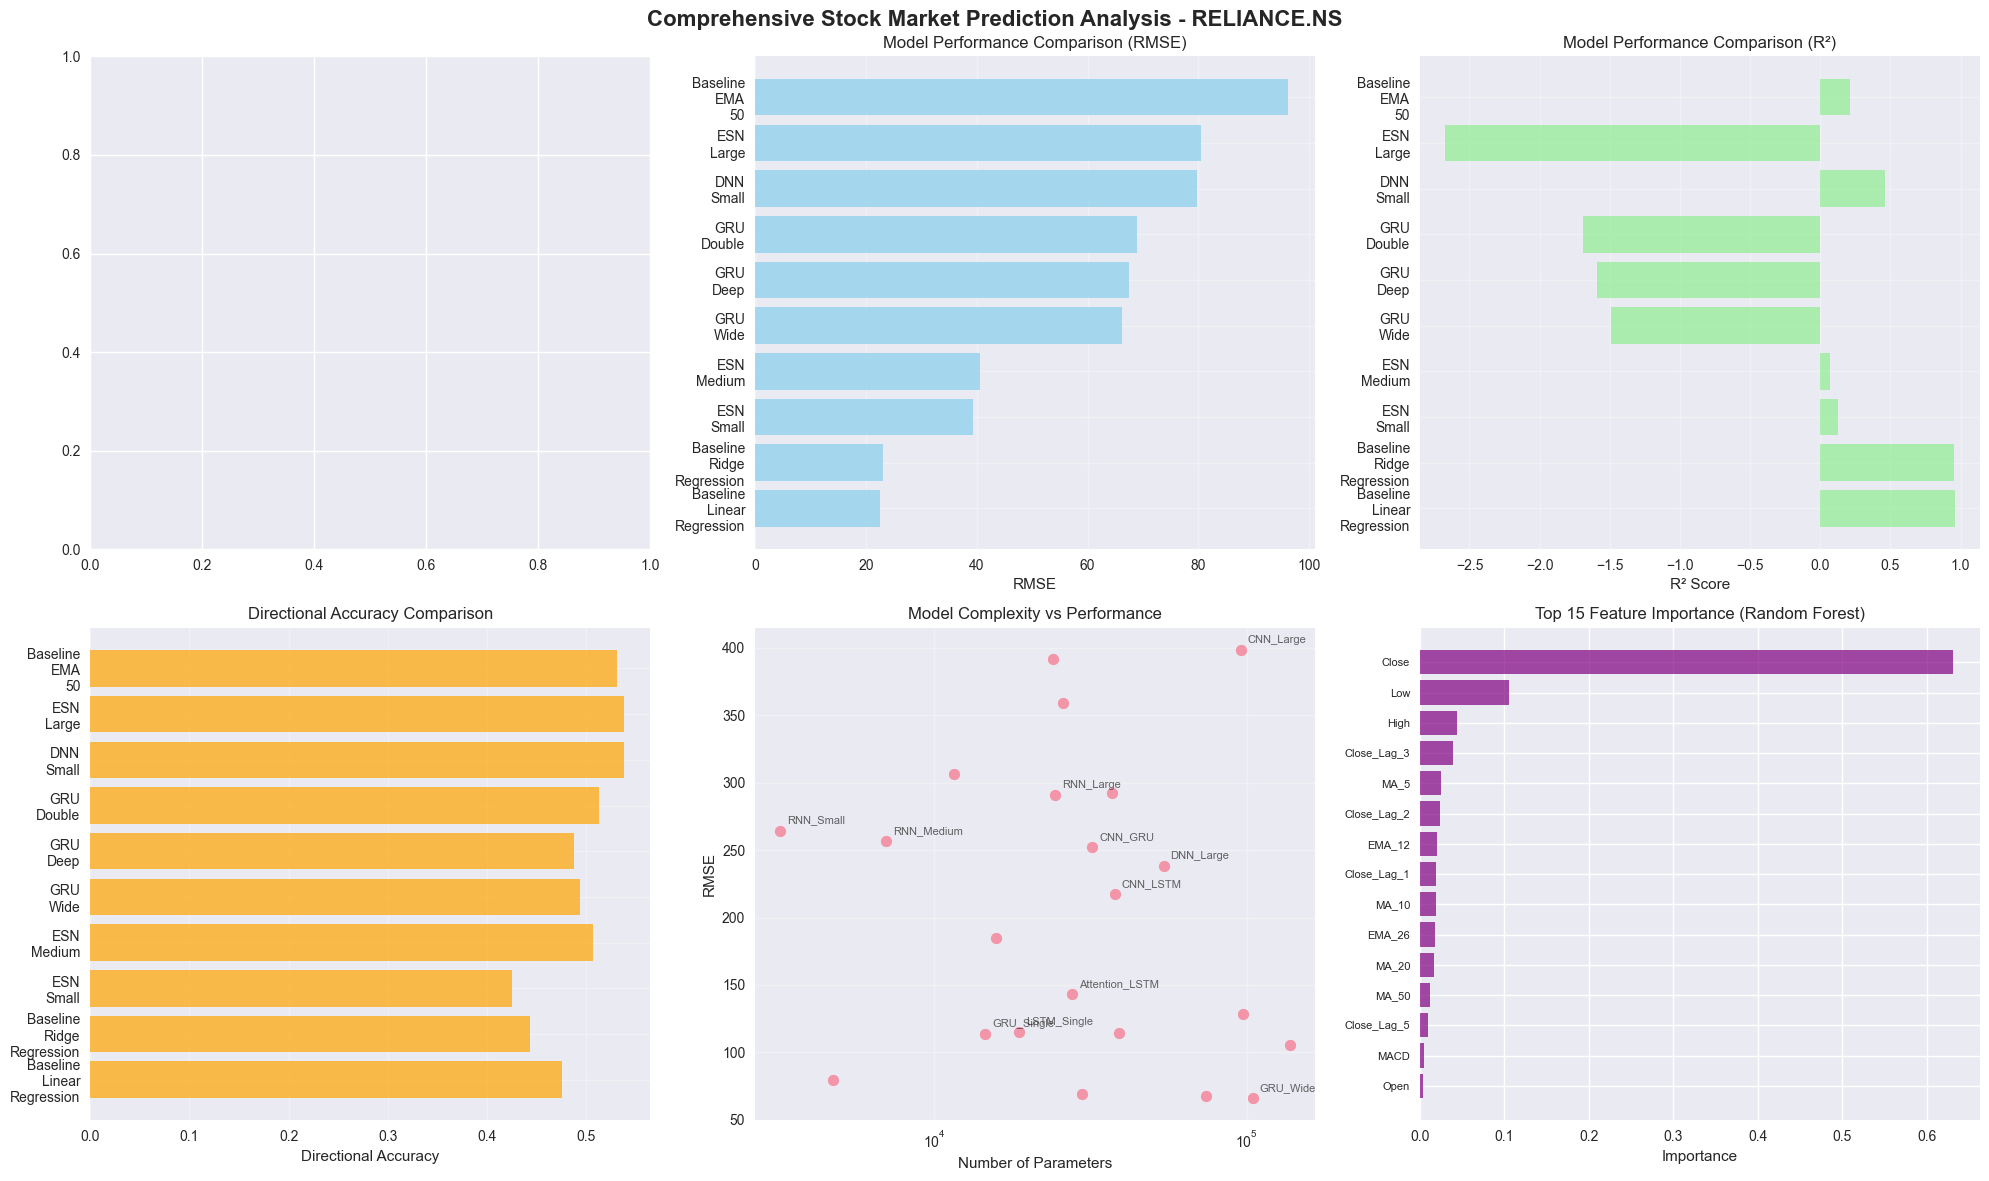

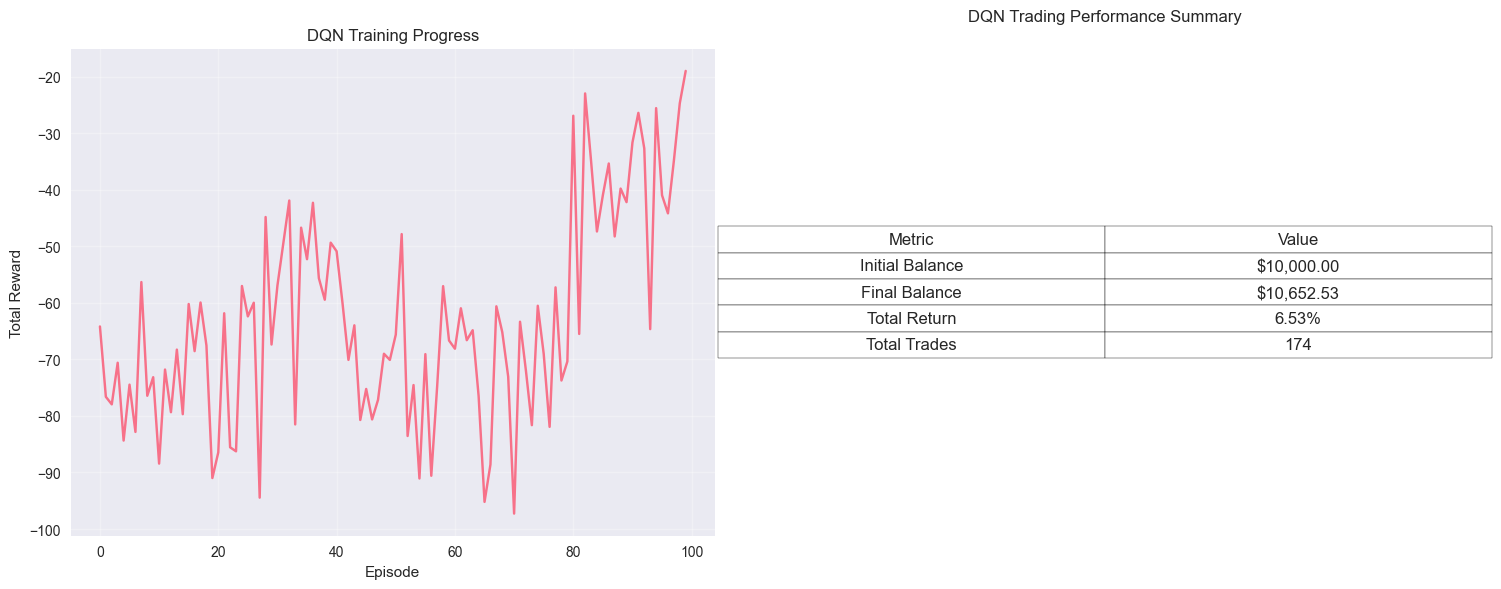


📊 FINAL MODEL SUMMARY STATISTICS
📈 Total Models Evaluated: 38
📈 Successfully Trained Models: 37
📈 Success Rate: 97.4%

📊 RMSE Statistics:
   Best: 22.48
   Worst: 398.32
   Mean: 167.10
   Std: 107.21

📊 R² Statistics:
   Best: 0.9571
   Worst: -89.1224
   Mean: -16.4011
   Std: 25.0037

📊 Directional Accuracy Statistics:
   Best: 0.5375
   Worst: 0.4250
   Mean: 0.4824
   Std: 0.0334

🎯 DEPLOYMENT RECOMMENDATIONS
----------------------------------------
Based on the comprehensive evaluation:

🥇 PRODUCTION DEPLOYMENT:
   Model: Baseline_Linear_Regression
   Type: Baseline
   RMSE: 22.48
   R²: 0.9571
   Directional Accuracy: 0.4750

🥈 BACKUP MODELS:
   2. Baseline_Ridge_Regression (RMSE: 23.10, R²: 0.9547)
   3. ESN_Small (RMSE: 39.29, R²: 0.1232)

💰 TRADING STRATEGY:
   DQN Agent Return: 6.53%
   Recommended for: Automated trading decisions

⚠️  IMPORTANT CONSIDERATIONS:
   • Test on out-of-sample data before deployment
   • Implement proper risk management
   • Monitor model perform

In [19]:
# 📈 Visualization and Results Analysis
print("\n📈 VISUALIZATION & RESULTS ANALYSIS")
print("=" * 45)

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(f'Comprehensive Stock Market Prediction Analysis - {primary_stock}', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted (Best Model)
if sorted_models:
    best_model_name, best_results, _ = sorted_models[0]
    
    # Get predictions for the best model
    if best_model_name in hybrid_results:
        best_predictions = hybrid_results[best_model_name]['predictions']['test']
    elif best_model_name in lstm_results:
        best_predictions = lstm_results[best_model_name]['predictions']['test']
    elif best_model_name in gru_results:
        best_predictions = gru_results[best_model_name]['predictions']['test']
    elif best_model_name in cnn_results:
        best_predictions = cnn_results[best_model_name]['predictions']['test']
    elif best_model_name in dnn_results:
        best_predictions = dnn_results[best_model_name]['predictions']['test']
    else:
        best_predictions = None
    
    if best_predictions is not None:
        # Convert back to original scale
        y_test_original = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()
        pred_original = target_scaler.inverse_transform(best_predictions.reshape(-1, 1)).flatten()
        
        axes[0, 0].plot(y_test_original[:100], label='Actual', alpha=0.8)
        axes[0, 0].plot(pred_original[:100], label='Predicted', alpha=0.8)
        axes[0, 0].set_title(f'Actual vs Predicted - {best_model_name}')
        axes[0, 0].set_xlabel('Time Steps')
        axes[0, 0].set_ylabel('Stock Price')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

# 2. Model Performance Comparison (RMSE)
model_names = []
rmse_values = []

for model_name, results, rmse in sorted_models[:10]:  # Top 10 models
    model_names.append(model_name.replace('_', '\n'))
    rmse_values.append(rmse)

axes[0, 1].barh(model_names, rmse_values, color='skyblue', alpha=0.7)
axes[0, 1].set_title('Model Performance Comparison (RMSE)')
axes[0, 1].set_xlabel('RMSE')
axes[0, 1].grid(True, alpha=0.3)

# 3. R² Score Comparison
r2_values = []
for model_name, results, _ in sorted_models[:10]:
    r2 = results['test'].get('R²', 0)
    r2_values.append(r2)

axes[0, 2].barh(model_names, r2_values, color='lightgreen', alpha=0.7)
axes[0, 2].set_title('Model Performance Comparison (R²)')
axes[0, 2].set_xlabel('R² Score')
axes[0, 2].grid(True, alpha=0.3)

# 4. Directional Accuracy Comparison
dir_acc_values = []
for model_name, results, _ in sorted_models[:10]:
    dir_acc = results['test'].get('Directional_Accuracy', 0)
    dir_acc_values.append(dir_acc)

axes[1, 0].barh(model_names, dir_acc_values, color='orange', alpha=0.7)
axes[1, 0].set_title('Directional Accuracy Comparison')
axes[1, 0].set_xlabel('Directional Accuracy')
axes[1, 0].grid(True, alpha=0.3)

# 5. Model Complexity vs Performance
if complexity_analysis:
    params_list = [x[1] for x in complexity_analysis]
    rmse_list = [x[2] for x in complexity_analysis]
    model_labels = [x[0] for x in complexity_analysis]
    
    scatter = axes[1, 1].scatter(params_list, rmse_list, alpha=0.7, s=60)
    axes[1, 1].set_title('Model Complexity vs Performance')
    axes[1, 1].set_xlabel('Number of Parameters')
    axes[1, 1].set_ylabel('RMSE')
    axes[1, 1].set_xscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add labels for some points
    for i, (name, params, rmse, r2) in enumerate(complexity_analysis[::2]):  # Every 2nd model
        axes[1, 1].annotate(name, (params, rmse), xytext=(5, 5), 
                           textcoords='offset points', fontsize=8, alpha=0.7)

# 6. Feature Importance (if available from Random Forest)
if 'Random_Forest' in regression_results and hasattr(regression_results['Random_Forest']['model'], 'feature_importances_'):
    rf_model = regression_results['Random_Forest']['model']
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(15)
    
    axes[1, 2].barh(importance_df['feature'], importance_df['importance'], color='purple', alpha=0.7)
    axes[1, 2].set_title('Top 15 Feature Importance (Random Forest)')
    axes[1, 2].set_xlabel('Importance')
    axes[1, 2].tick_params(axis='y', labelsize=8)
else:
    # Show stock price evolution instead
    axes[1, 2].plot(processed_df.index[-200:], processed_df['Close'].iloc[-200:])
    axes[1, 2].set_title(f'{primary_stock} - Recent Price Evolution')
    axes[1, 2].set_xlabel('Date')
    axes[1, 2].set_ylabel('Close Price')
    axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Trading Performance Analysis (if DQN results available)
if 'dqn_results' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Training progress
    axes[0].plot(dqn_results['training_scores'])
    axes[0].set_title('DQN Training Progress')
    axes[0].set_xlabel('Episode')
    axes[0].set_ylabel('Total Reward')
    axes[0].grid(True, alpha=0.3)
    
    # Trading performance summary
    performance_data = {
        'Metric': ['Initial Balance', 'Final Balance', 'Total Return', 'Total Trades'],
        'Value': [f'${dqn_results["test_env"].initial_balance:,.2f}',
                 f'${dqn_results["test_env"].net_worth:,.2f}',
                 f'{dqn_results["test_return"]:.2f}%',
                 f'{dqn_results["total_trades"]}']
    }
    
    performance_df = pd.DataFrame(performance_data)
    
    # Create table
    axes[1].axis('tight')
    axes[1].axis('off')
    table = axes[1].table(cellText=performance_df.values,
                         colLabels=performance_df.columns,
                         cellLoc='center',
                         loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    axes[1].set_title('DQN Trading Performance Summary', pad=20)
    
    plt.tight_layout()
    plt.show()

# Model Summary Statistics
print(f"\n📊 FINAL MODEL SUMMARY STATISTICS")
print("=" * 50)

if sorted_models:
    total_models = len(all_results)
    successful_models = len(sorted_models)
    
    # Calculate summary statistics
    rmse_values = [x[2] for x in sorted_models]
    r2_values = [x[1]['test']['R²'] for x in sorted_models]
    dir_acc_values = [x[1]['test']['Directional_Accuracy'] for x in sorted_models]
    
    print(f"📈 Total Models Evaluated: {total_models}")
    print(f"📈 Successfully Trained Models: {successful_models}")
    print(f"📈 Success Rate: {successful_models/total_models*100:.1f}%")
    print()
    
    print(f"📊 RMSE Statistics:")
    print(f"   Best: {min(rmse_values):.2f}")
    print(f"   Worst: {max(rmse_values):.2f}")
    print(f"   Mean: {np.mean(rmse_values):.2f}")
    print(f"   Std: {np.std(rmse_values):.2f}")
    print()
    
    print(f"📊 R² Statistics:")
    print(f"   Best: {max(r2_values):.4f}")
    print(f"   Worst: {min(r2_values):.4f}")
    print(f"   Mean: {np.mean(r2_values):.4f}")
    print(f"   Std: {np.std(r2_values):.4f}")
    print()
    
    print(f"📊 Directional Accuracy Statistics:")
    print(f"   Best: {max(dir_acc_values):.4f}")
    print(f"   Worst: {min(dir_acc_values):.4f}")
    print(f"   Mean: {np.mean(dir_acc_values):.4f}")
    print(f"   Std: {np.std(dir_acc_values):.4f}")

print(f"\n🎯 DEPLOYMENT RECOMMENDATIONS")
print("-" * 40)
print("Based on the comprehensive evaluation:")
print()

if sorted_models:
    # Get top 3 models
    top_3 = sorted_models[:3]
    
    print("🥇 PRODUCTION DEPLOYMENT:")
    best_model = top_3[0]
    print(f"   Model: {best_model[0]}")
    print(f"   Type: {best_model[1]['model_type']}")
    print(f"   RMSE: {best_model[2]:.2f}")
    print(f"   R²: {best_model[1]['test']['R²']:.4f}")
    print(f"   Directional Accuracy: {best_model[1]['test']['Directional_Accuracy']:.4f}")
    print()
    
    print("🥈 BACKUP MODELS:")
    for i, (model_name, results, rmse) in enumerate(top_3[1:], 1):
        print(f"   {i+1}. {model_name} (RMSE: {rmse:.2f}, R²: {results['test']['R²']:.4f})")
    print()

if 'dqn_results' in locals():
    print("💰 TRADING STRATEGY:")
    print(f"   DQN Agent Return: {dqn_results['test_return']:.2f}%")
    print(f"   Recommended for: Automated trading decisions")
    print()

print("⚠️  IMPORTANT CONSIDERATIONS:")
print("   • Test on out-of-sample data before deployment")
print("   • Implement proper risk management")
print("   • Monitor model performance in production")
print("   • Consider ensemble methods for robustness")
print("   • Regular model retraining required")

print(f"\n✅ Comprehensive stock market prediction analysis completed!")
print(f"🎯 Ready for production deployment with proper risk management!")